# Evaluation Notebook

This notebook loads results from running Ada Boost, Decision Trees, K Nearest Neighbor, Logistic Regression and Random Forests models through a large parameter grid. These models are evaluated based on precision at 5% of the population. These results are then compared to baseline decision trees and logistic regression models with limited features.

The two-level decision tree made with solely prior mental health encounters as a feature can be seen in the notebook, though this performs slightly worse than our top KNN and RF models, which had precision at 5% of 25% and 8% respectively. Since the KNN method does not give an indication of which features are correlated with the outcome, we visualize feature importance using the RF model and display a correlation heatmap between the importance features and the label.

Finally, we check for bias in our model based on race and gender. Because there are so few female inmates in our dataset, our models are biased based on gender.

## To run evaluation.py you will need to have Aequitas installed
- All package installation requirements have been saved in requirements.txt
- If you are working in a virtual environmnent, activate it and pip install -r requirements.txt
- Make sure your jupyter kernel is pointing to your virtual environment

In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore',category=DeprecationWarning)

% run pipeline/explore.py
% run pipeline/features.py
% run pipeline/preprocess.py
% run pipeline/methods_loop.py
% run pipeline/evaluation.py

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/stablegeniuses-mlpp2018/.venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/stablegeniuses-mlpp2018/.venv/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
all_results = get_all_results(['results/FINAL.pkl', 'results/last_split.pkl'])
all_results.to_csv('results/five_year.csv', index=False)
#all_results = pd.read_csv('results/F.pkl')

### View Mean Precision and Standard Deviation of each model across all time splits

In [81]:
for k, grp in all_results.groupby(['model_type']):
    print(k, grp.precision_at_5.mean(), grp.precision_at_5.std())

AB 0.07647999499448103 0.04260736302359459
DT 0.10636929661924928 0.10848750296311353
KNN 0.13814251098382382 0.13088645409206973
LR 0.1989629721571371 0.13094263864474714
RF 0.07377951888293444 0.06647360208985896


In [82]:
for k, grp in all_results.groupby(['validation_date']):
    print(k, 'MAX:', grp.precision_at_5.max(), 'MEAN:', grp.precision_at_5.mean(), 'STD:', grp.precision_at_5.std())

2011-12-31 MAX: 0.6772727272727272 MEAN: 0.1314393939393939 STD: 0.11996612147237631
2012-12-31 MAX: 0.4523809523809524 MEAN: 0.11791187739463602 STD: 0.08825696770569674
2013-12-31 MAX: 0.25462962962962965 MEAN: 0.04567103022562793 STD: 0.06598999251283924
2014-12-31 MAX: 0.2679425837320574 MEAN: 0.07597756145850519 STD: 0.07725800801810513
2015-12-31 MAX: 0.4507042253521127 MEAN: 0.13054082068166575 STD: 0.10146701684376644


### Remove Results with no variation in risk scores, auc-roc below 0.5, and precision at 5 below the 50th percentile

In [83]:
tm = get_best_model(all_results, 'precision_at_5', .5)

In [84]:
for k, grp in tm.groupby(['model_type']):
    print(k, 'MEAN PRECISION:', grp.precision_at_5.mean(), 'MEAN AUC-ROC:',  grp['auc-roc'].mean())

AB MEAN PRECISION: 0.11214740232025765 MEAN AUC-ROC: 0.5771537261226753
DT MEAN PRECISION: 0.1326649069936518 MEAN AUC-ROC: 0.5537473611867715
KNN MEAN PRECISION: 0.129860713565229 MEAN AUC-ROC: 0.5796223535234701
LR MEAN PRECISION: 0.1359654312039677 MEAN AUC-ROC: 0.5659406999453225
RF MEAN PRECISION: 0.10105683554892299 MEAN AUC-ROC: 0.599338300248078


In [85]:
for k, grp in tm.groupby(['validation_date']):
    print(k, grp.precision_at_5.max(), grp.precision_at_5.mean(), grp.precision_at_5.std())

2011-12-31 0.15454545454545454 0.10528346192552837 0.0173788519204849
2012-12-31 0.1761904761904762 0.10541394981229008 0.022264305379012046
2013-12-31 0.25462962962962965 0.2387566137566138 0.043342915915866136
2014-12-31 0.2679425837320574 0.19924812030075187 0.06153922580670357
2015-12-31 0.2535211267605634 0.13398338750451427 0.06972595241183177


### Find model that performs best on last split: KNN

In [86]:
best_on_final = tm[tm['validation_date'] == '2015-12-31']

In [87]:
for k, grp in best_on_final.groupby(['model_type']):
    print(k, 'MAX:', grp.precision_at_5.max(), 'MEAN:', grp.precision_at_5.mean(), 'MAX AUC-ROC:', grp['auc-roc'].max())

AB MAX: 0.07981220657276995 MEAN: 0.07981220657276995 MAX AUC-ROC: 0.5574533659617693
DT MAX: 0.24413145539906103 MEAN: 0.19248826291079812 MAX AUC-ROC: 0.567828285160218
KNN MAX: 0.2535211267605634 MEAN: 0.20579029733959311 MAX AUC-ROC: 0.5334876258195586
LR MAX: 0.07981220657276995 MEAN: 0.07981220657276995 MAX AUC-ROC: 0.5425627943485085
RF MAX: 0.08450704225352113 MEAN: 0.08012519561815339 MAX AUC-ROC: 0.5637755102040817


### Run & compare basic Logistic Regression and Decision Tree models with just the MH 3 yr feature:
- mh_3yr: releasee had a prior encounter with the mental health system in the last 3 year before booking
```
temporal_validation_loop(CV_DATES, grid_size='small', to_run=['LR', 'DT'], basic=['mh_3yr'], filename='results/basic.pkl')
```

CUTOFF: 2010-12-31 VALIDATION: 2011-12-31
LR
{'C': 1e-05, 'penalty': 'l1'}
0.6772727272727272


<Figure size 432x288 with 0 Axes>

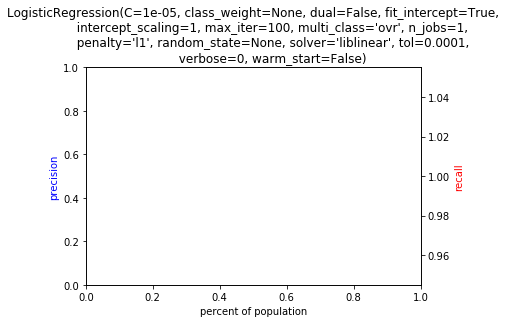

{'C': 1e-05, 'penalty': 'l2'}
0.5227272727272727


<Figure size 432x288 with 0 Axes>

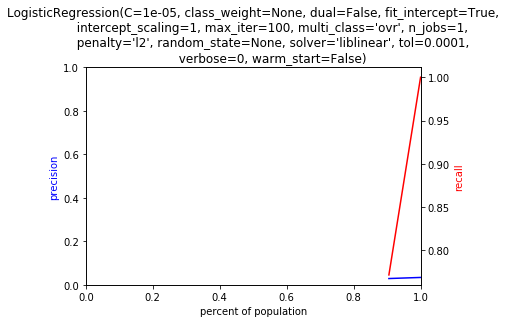

{'C': 0.001, 'penalty': 'l1'}
0.6772727272727272


<Figure size 432x288 with 0 Axes>

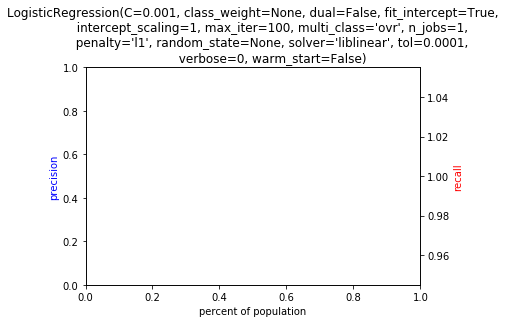

{'C': 0.001, 'penalty': 'l2'}
0.5227272727272727


<Figure size 432x288 with 0 Axes>

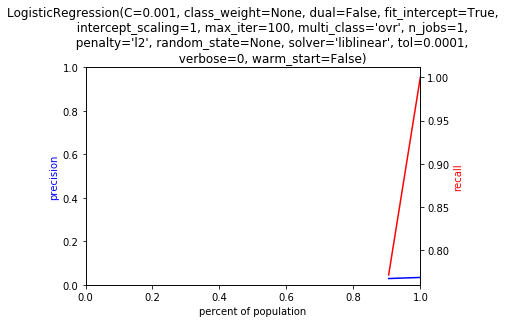

{'C': 0.1, 'penalty': 'l1'}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

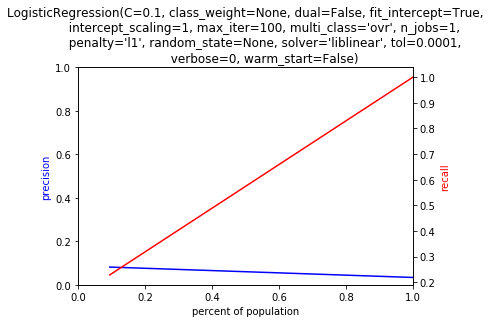

{'C': 0.1, 'penalty': 'l2'}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

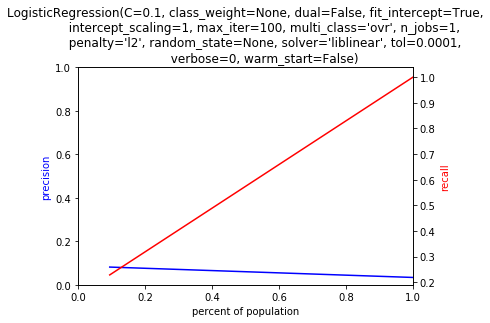

{'C': 1, 'penalty': 'l1'}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

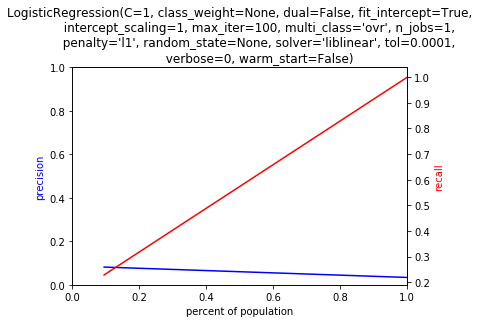

{'C': 1, 'penalty': 'l2'}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

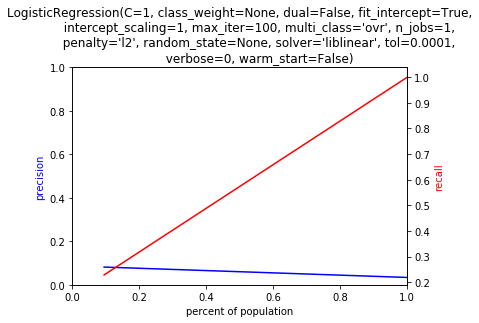

{'C': 10, 'penalty': 'l1'}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

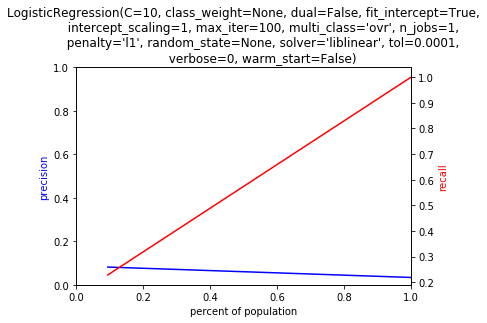

{'C': 10, 'penalty': 'l2'}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

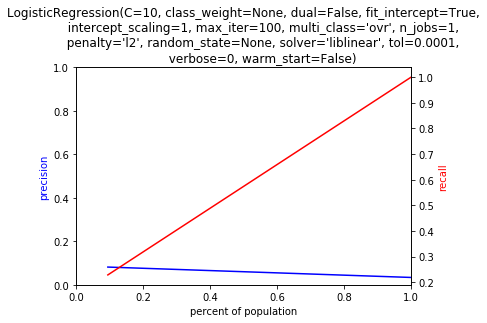

DT
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

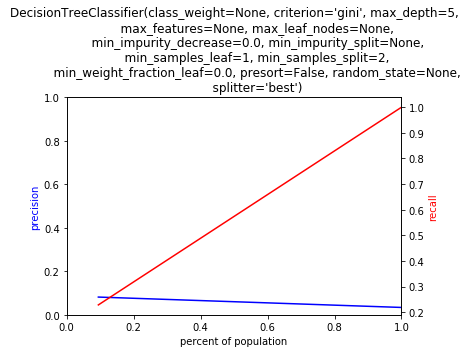

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

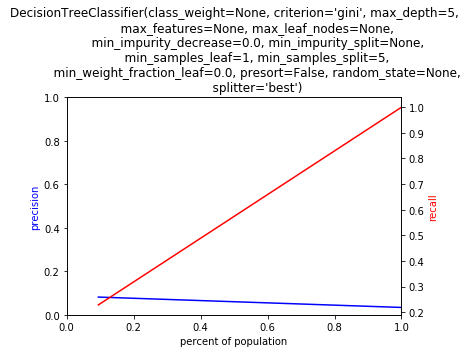

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

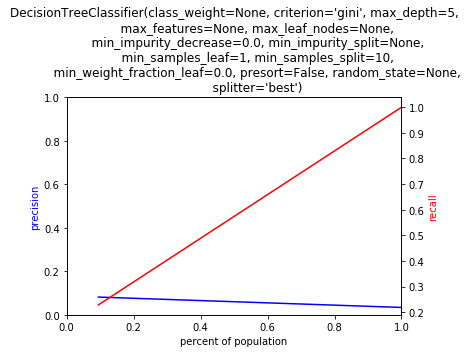

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

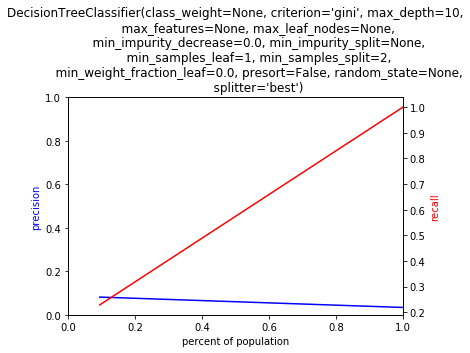

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

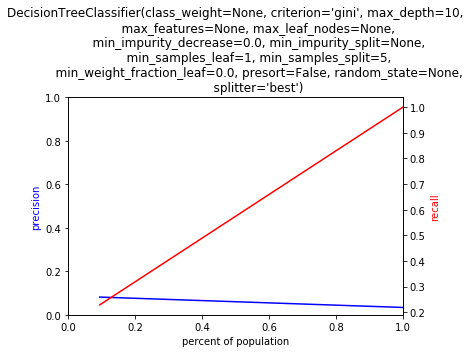

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

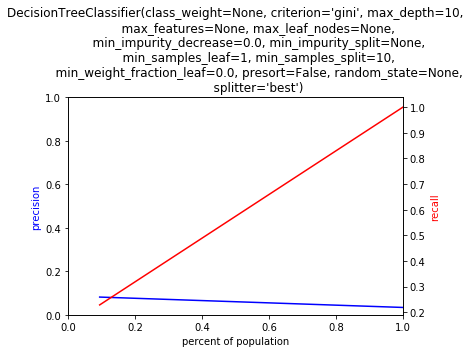

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

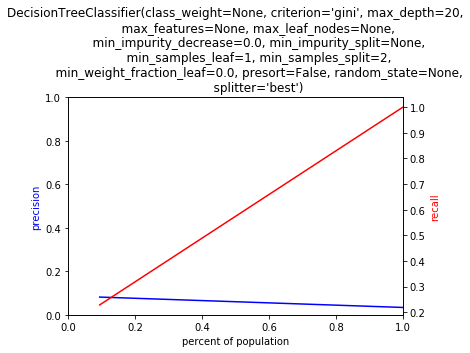

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

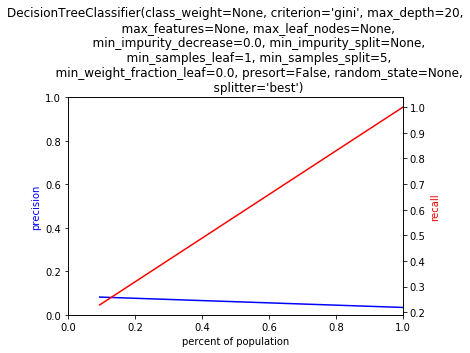

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

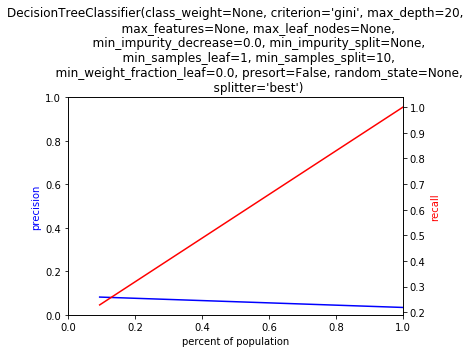

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

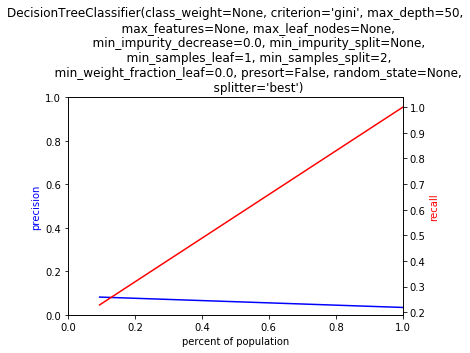

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

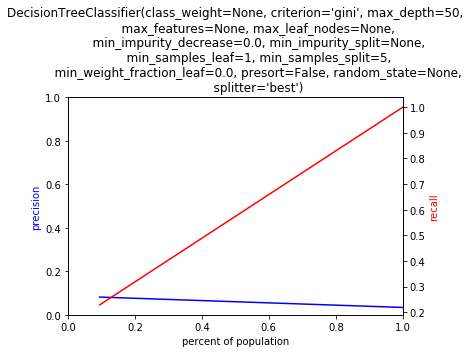

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

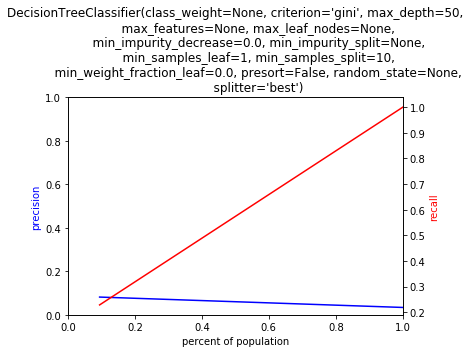

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

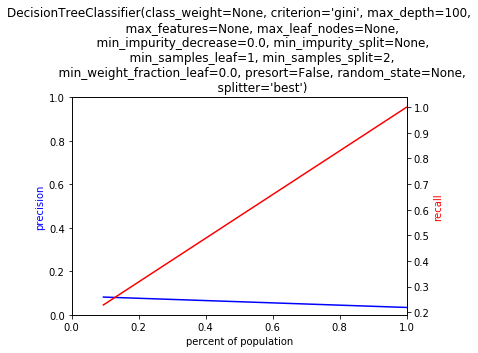

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

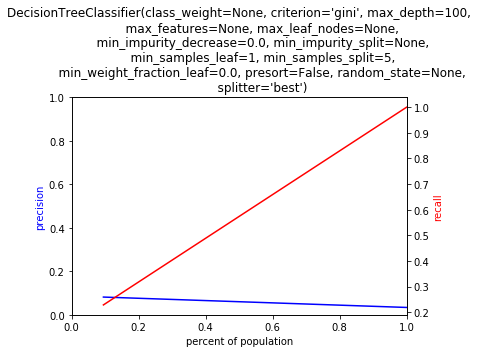

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

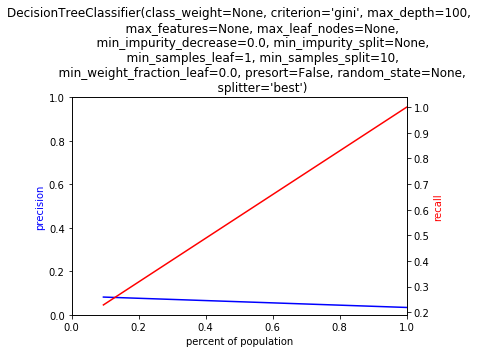

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

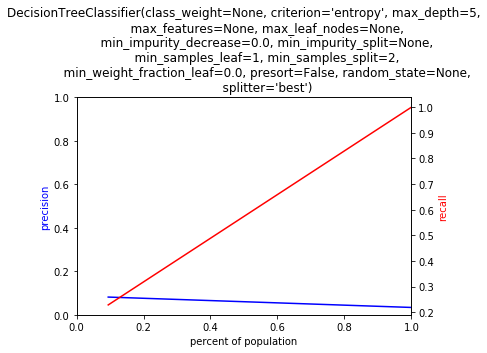

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

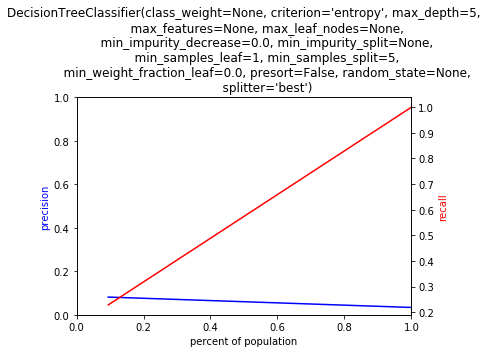

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

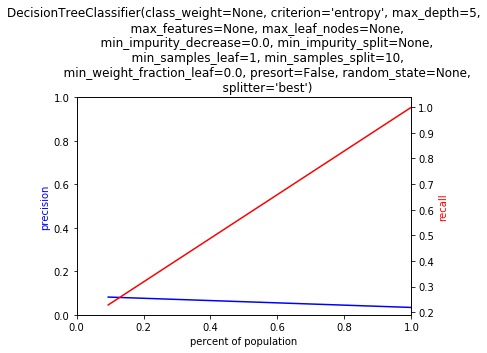

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

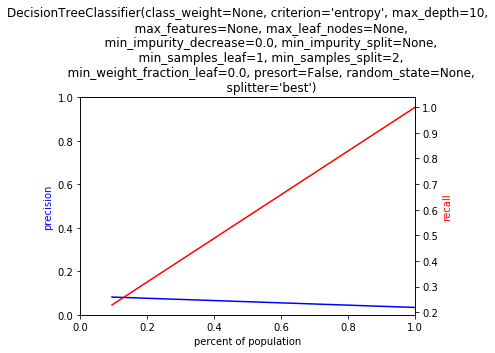

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

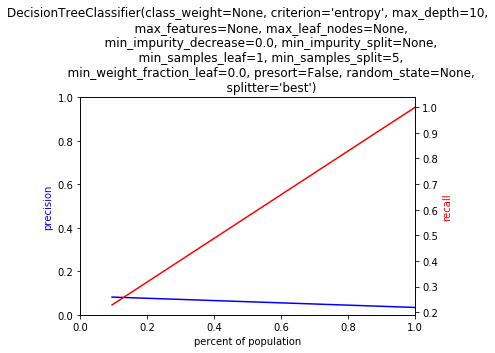

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

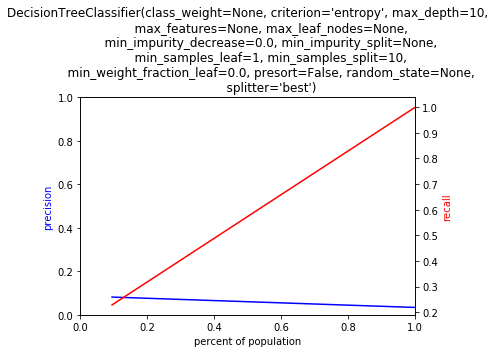

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

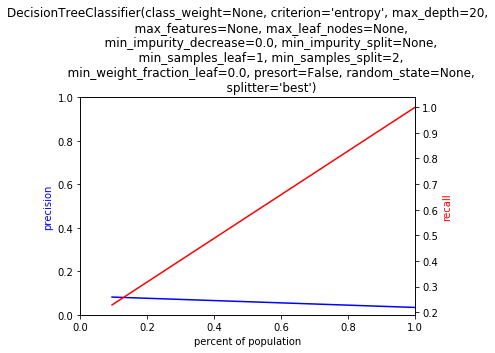

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

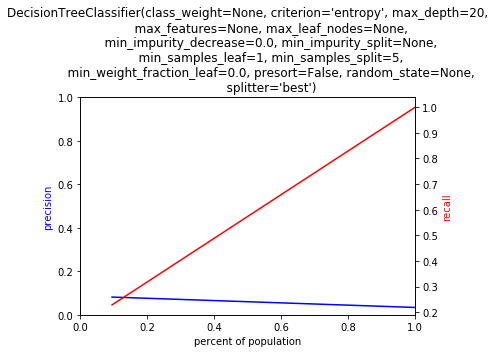

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

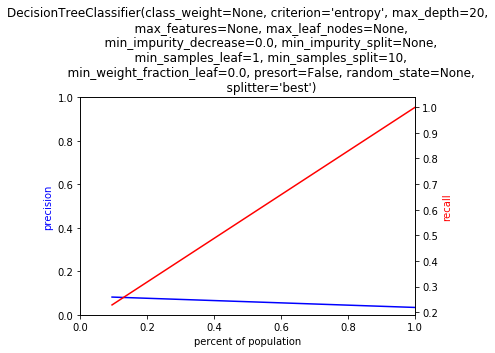

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

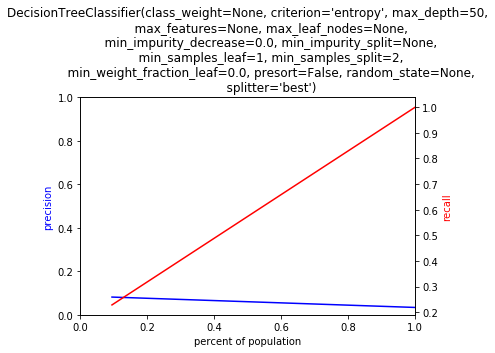

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

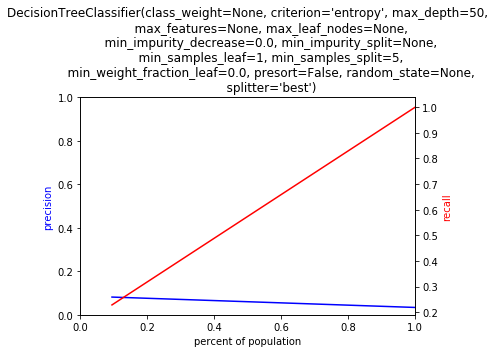

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

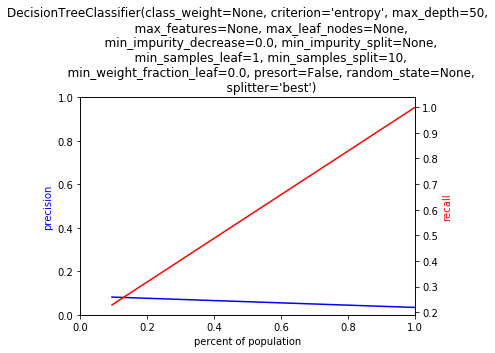

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

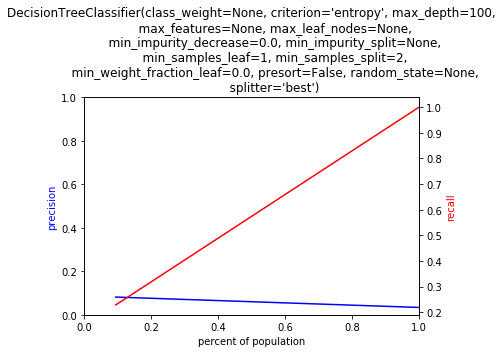

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

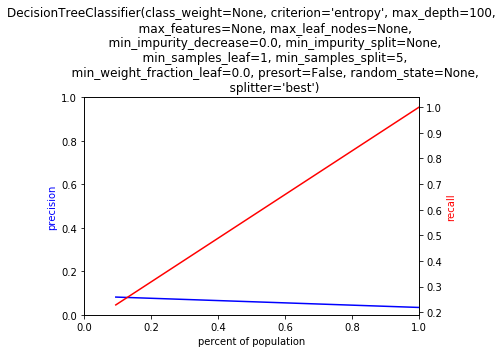

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.15454545454545454


<Figure size 432x288 with 0 Axes>

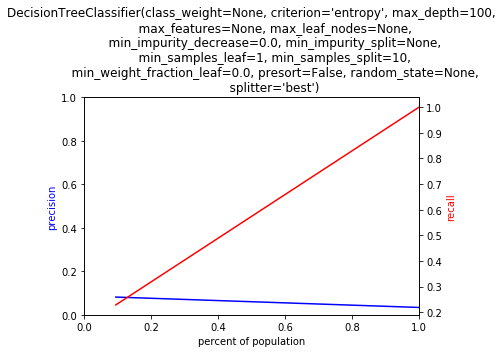

CUTOFF: 2011-12-31 VALIDATION: 2012-12-31
LR
{'C': 1e-05, 'penalty': 'l1'}
0.4523809523809524


<Figure size 432x288 with 0 Axes>

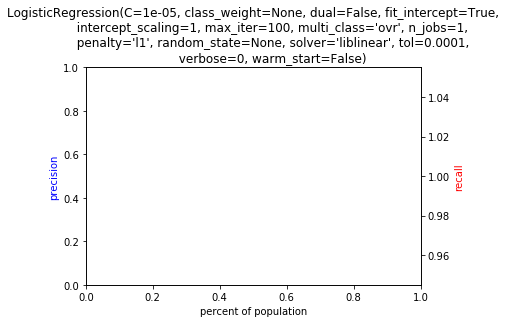

{'C': 1e-05, 'penalty': 'l2'}
0.2761904761904762


<Figure size 432x288 with 0 Axes>

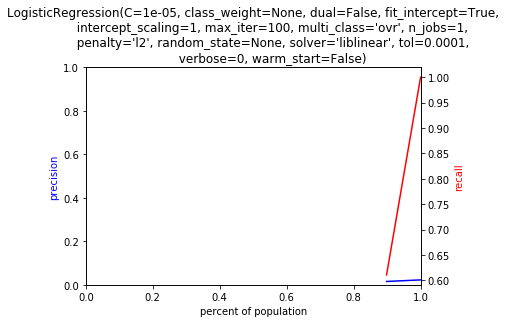

{'C': 0.001, 'penalty': 'l1'}
0.4523809523809524


<Figure size 432x288 with 0 Axes>

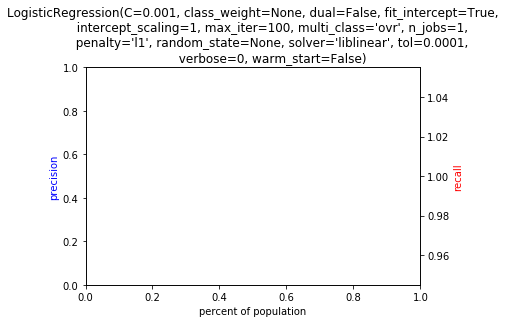

{'C': 0.001, 'penalty': 'l2'}
0.2761904761904762


<Figure size 432x288 with 0 Axes>

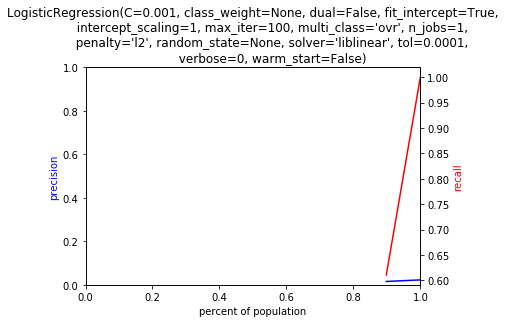

{'C': 0.1, 'penalty': 'l1'}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

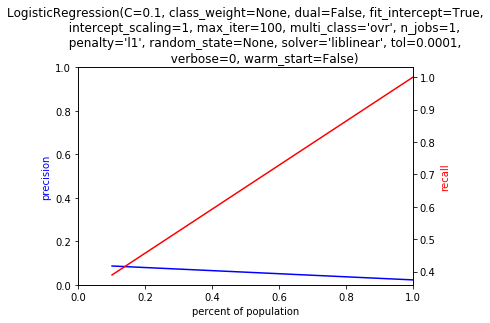

{'C': 0.1, 'penalty': 'l2'}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

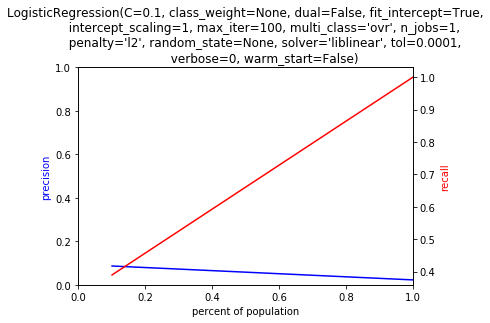

{'C': 1, 'penalty': 'l1'}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

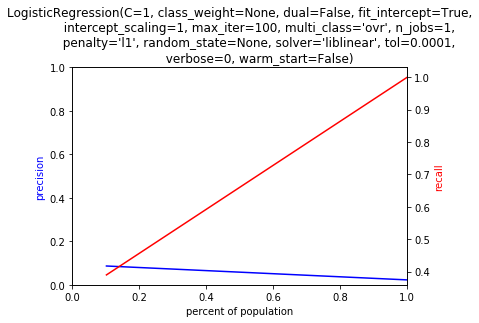

{'C': 1, 'penalty': 'l2'}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

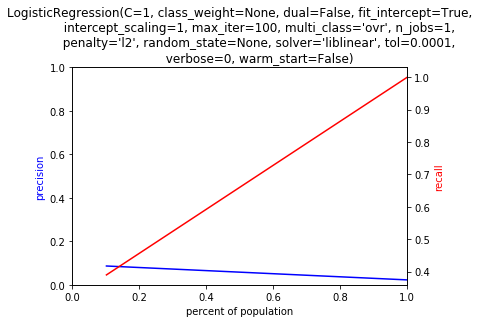

{'C': 10, 'penalty': 'l1'}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

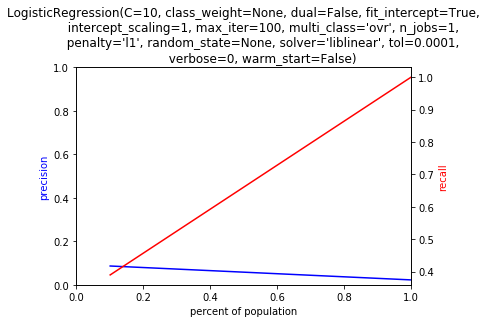

{'C': 10, 'penalty': 'l2'}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

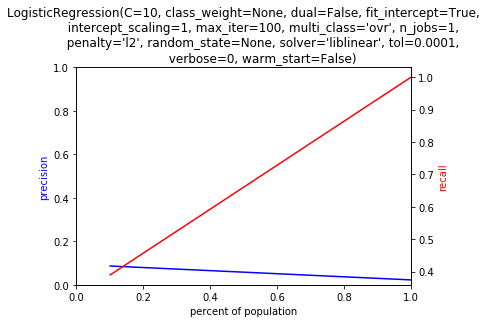

DT
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

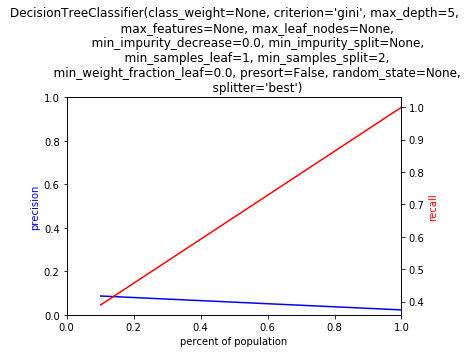

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

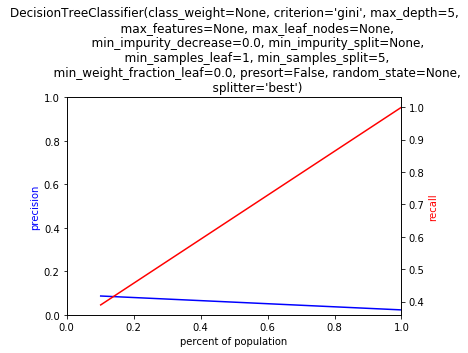

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

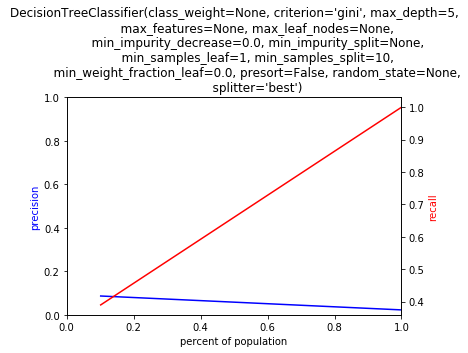

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

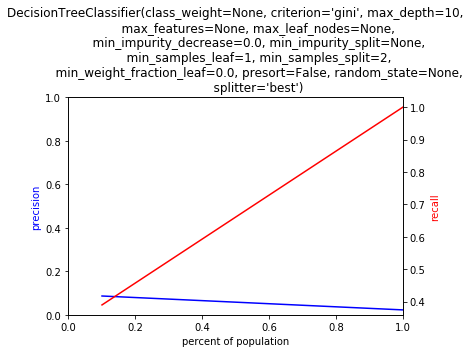

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

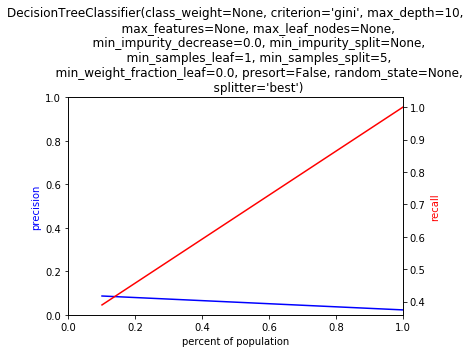

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

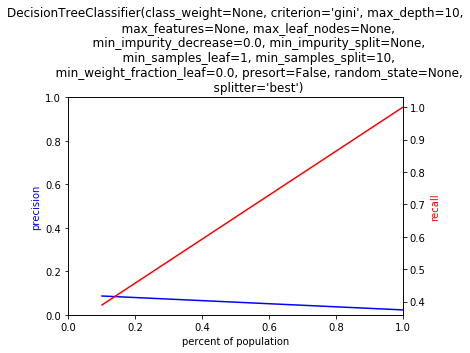

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

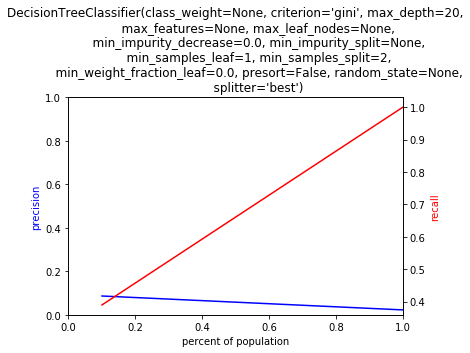

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

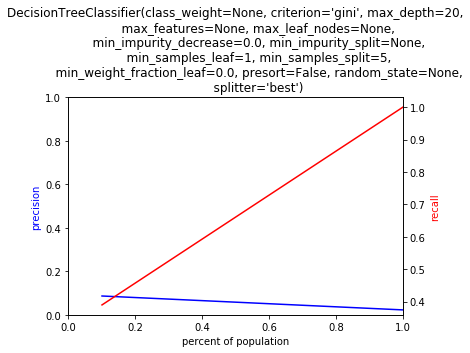

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

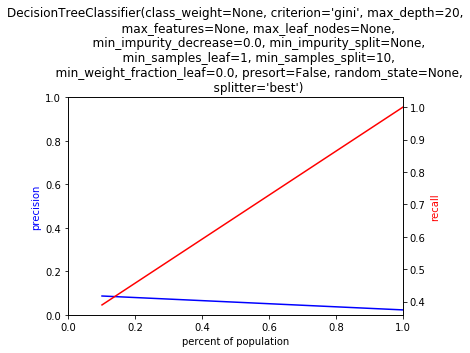

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

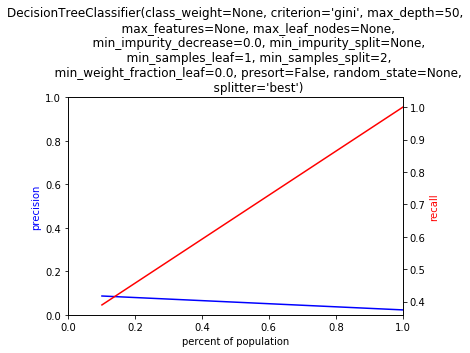

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

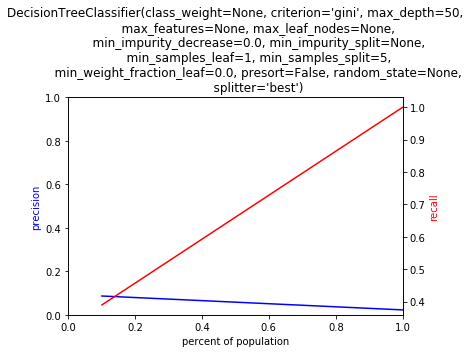

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

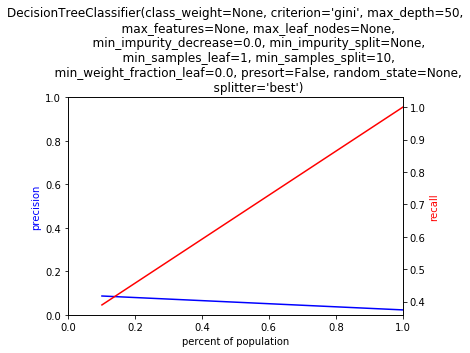

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

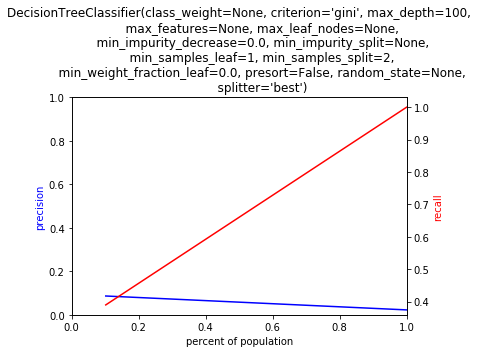

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

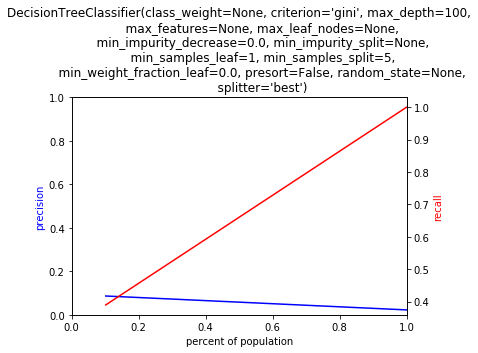

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

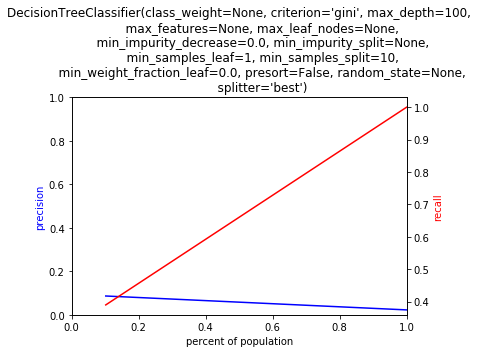

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

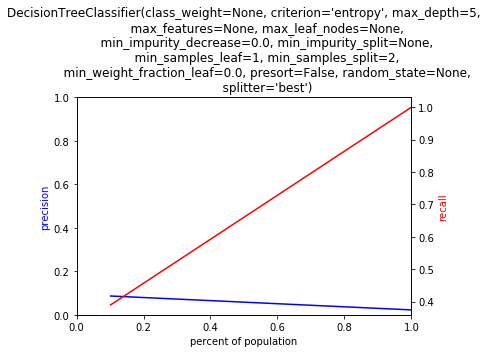

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

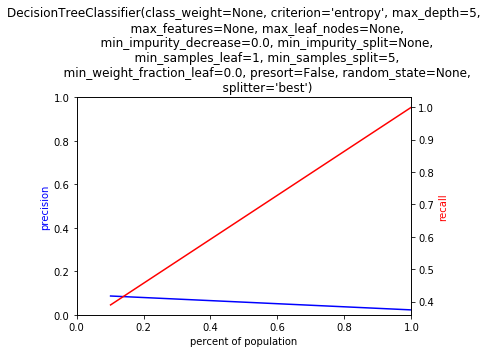

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

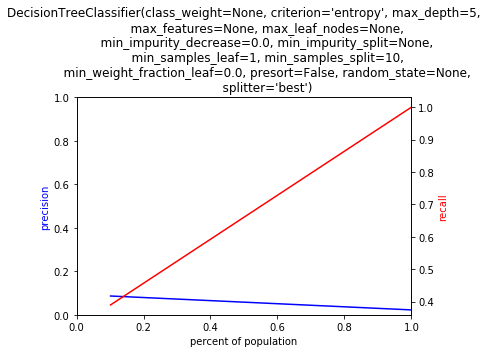

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

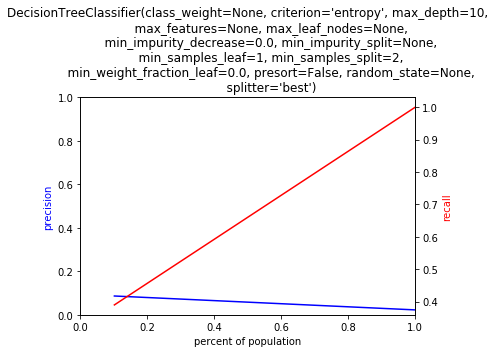

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

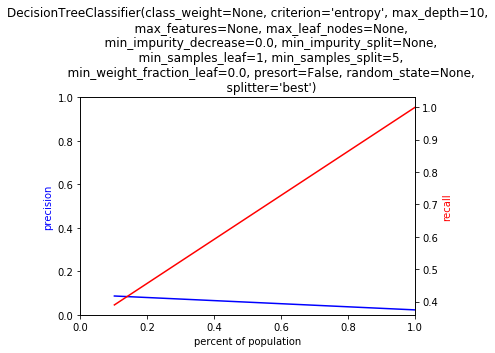

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

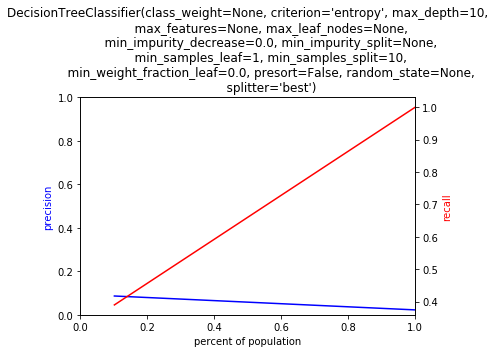

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

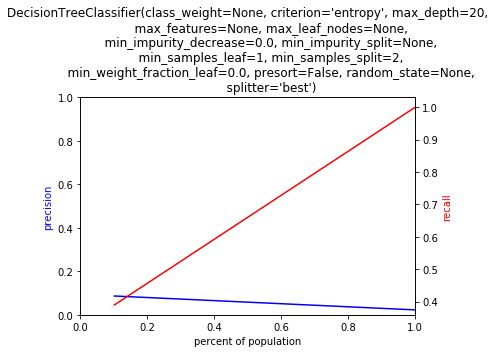

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

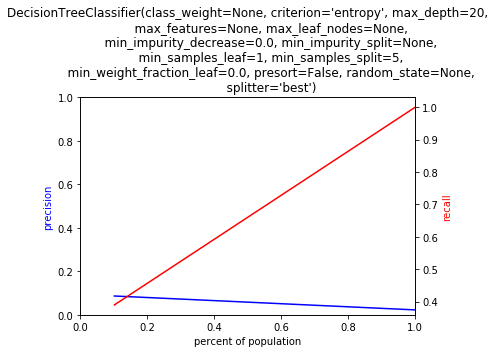

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

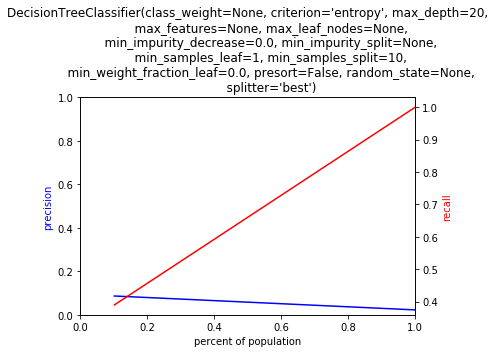

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

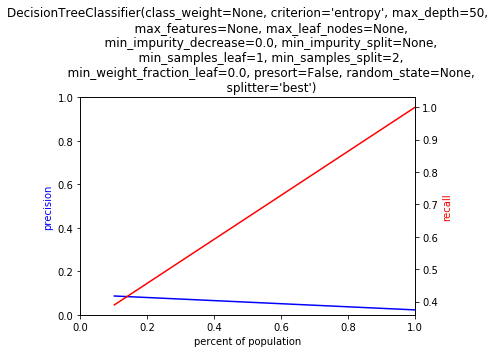

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

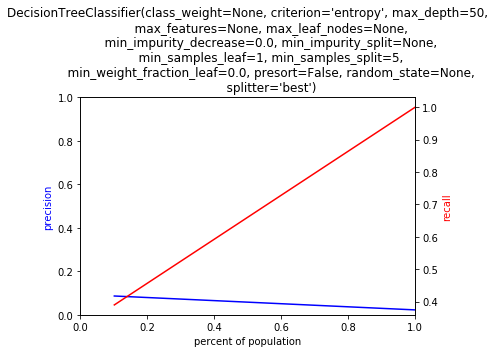

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

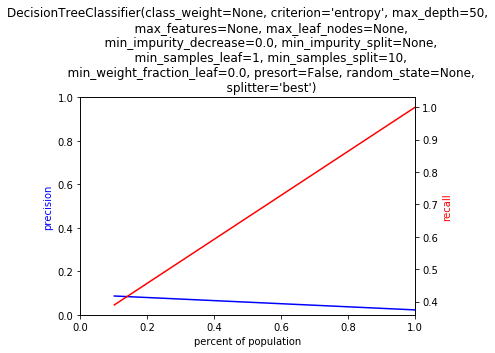

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

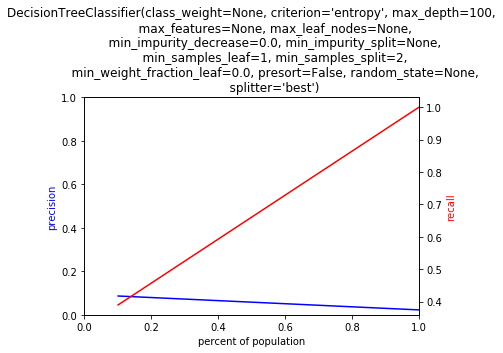

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

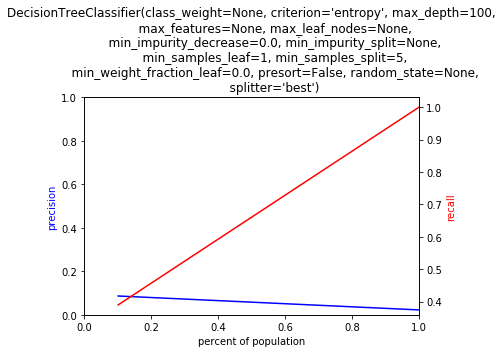

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.1761904761904762


<Figure size 432x288 with 0 Axes>

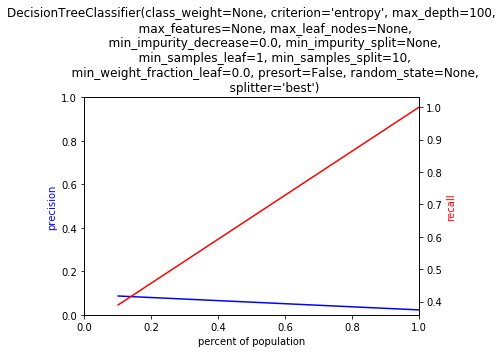

CUTOFF: 2012-12-31 VALIDATION: 2013-12-31
LR
{'C': 1e-05, 'penalty': 'l1'}
0.25462962962962965


<Figure size 432x288 with 0 Axes>

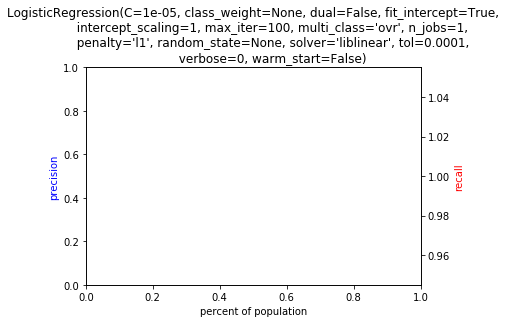

{'C': 1e-05, 'penalty': 'l2'}
0.20833333333333334


<Figure size 432x288 with 0 Axes>

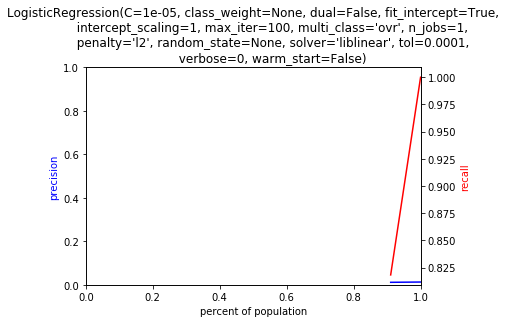

{'C': 0.001, 'penalty': 'l1'}
0.25462962962962965


<Figure size 432x288 with 0 Axes>

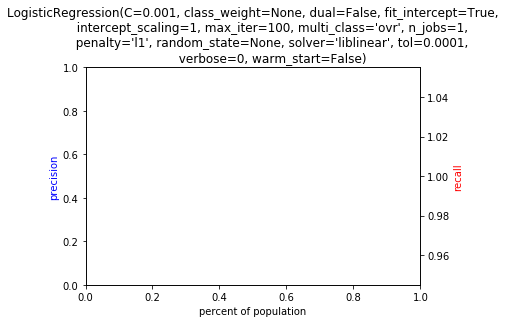

{'C': 0.001, 'penalty': 'l2'}
0.20833333333333334


<Figure size 432x288 with 0 Axes>

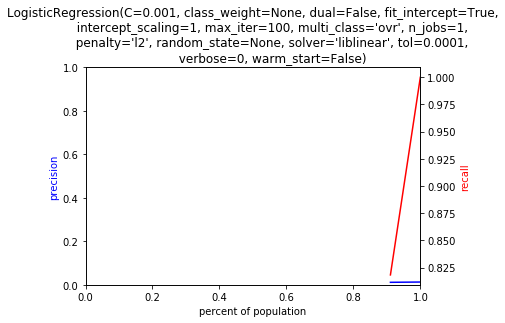

{'C': 0.1, 'penalty': 'l1'}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

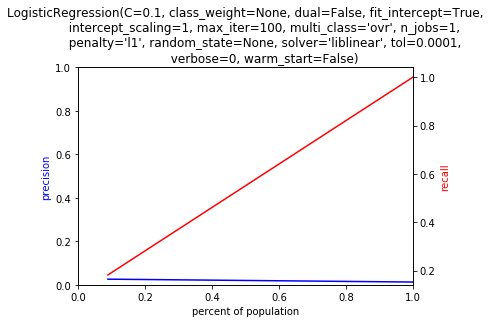

{'C': 0.1, 'penalty': 'l2'}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

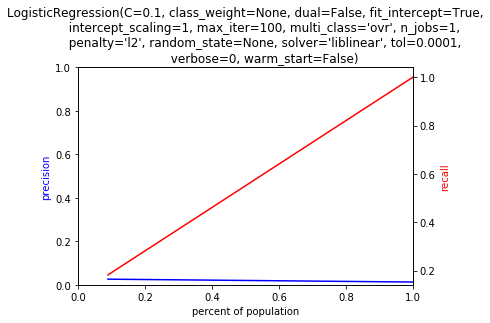

{'C': 1, 'penalty': 'l1'}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

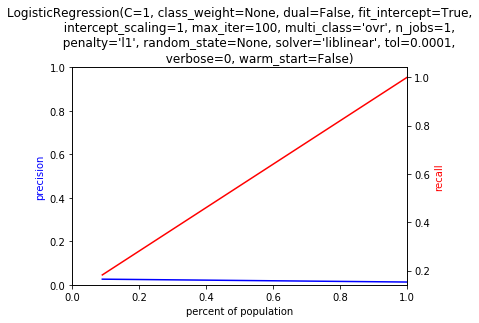

{'C': 1, 'penalty': 'l2'}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

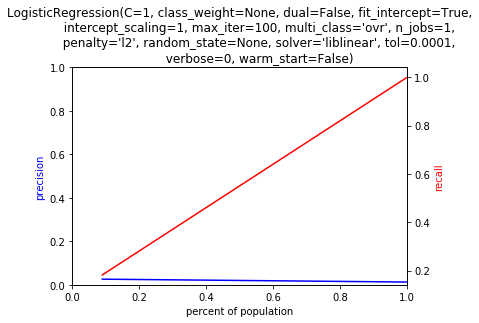

{'C': 10, 'penalty': 'l1'}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

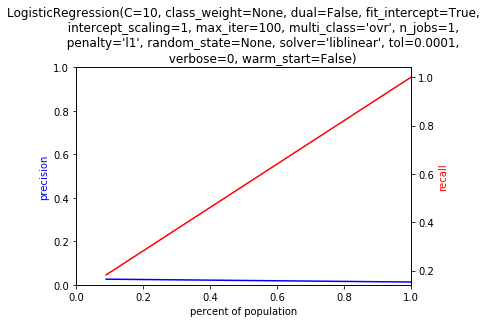

{'C': 10, 'penalty': 'l2'}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

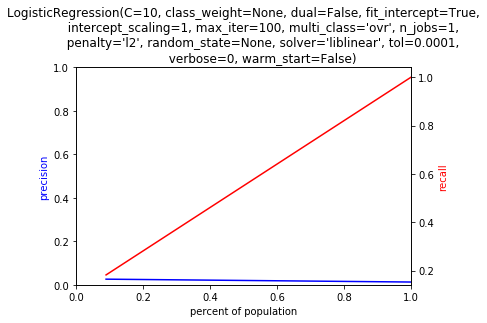

DT
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

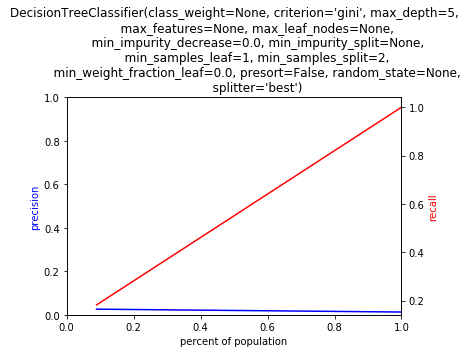

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

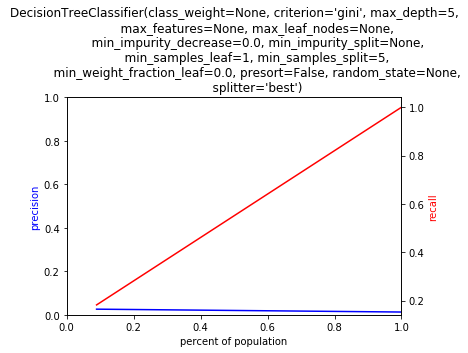

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

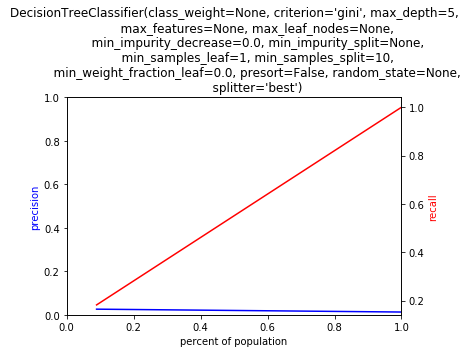

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

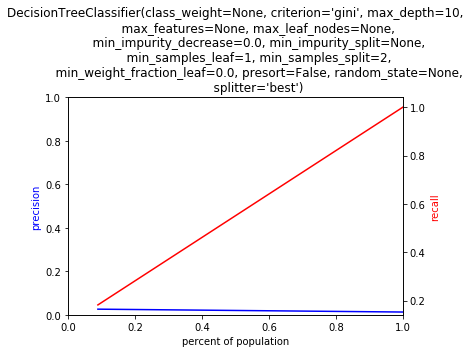

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

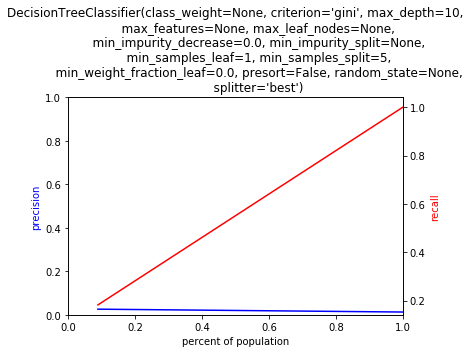

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

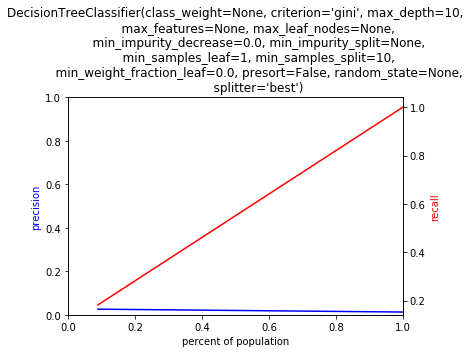

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

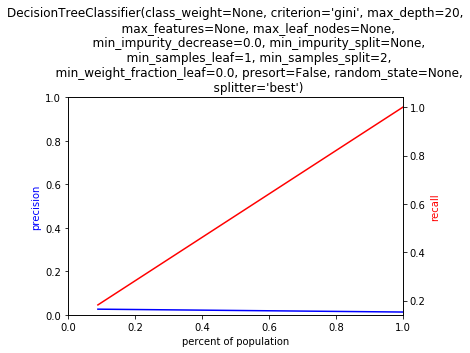

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

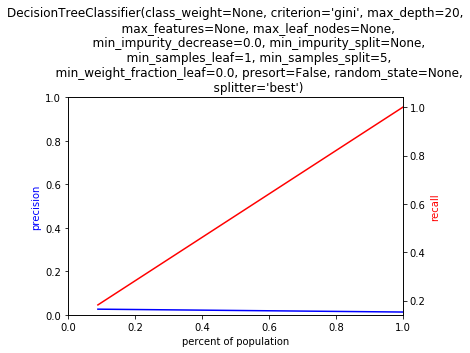

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

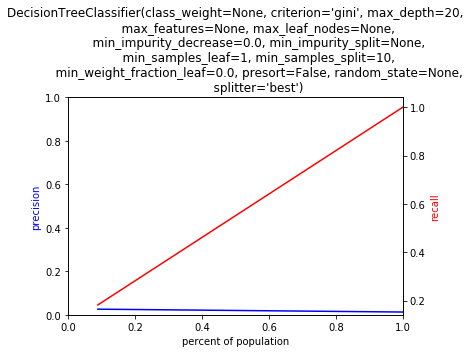

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

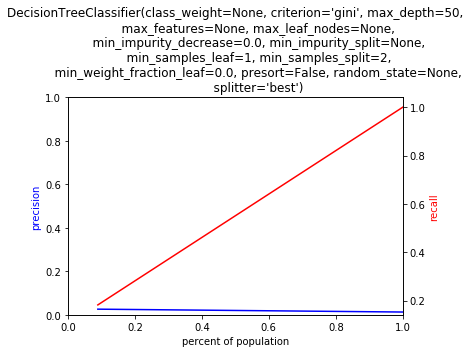

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

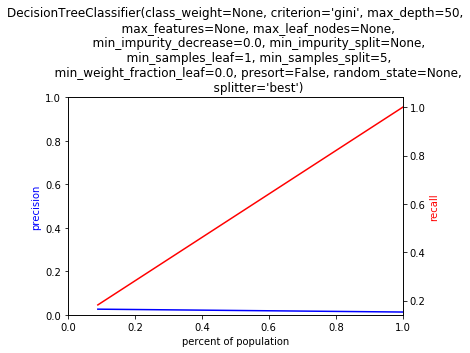

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

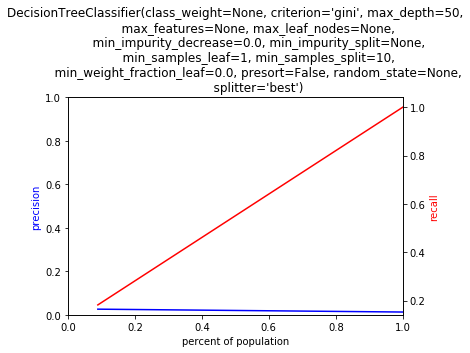

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

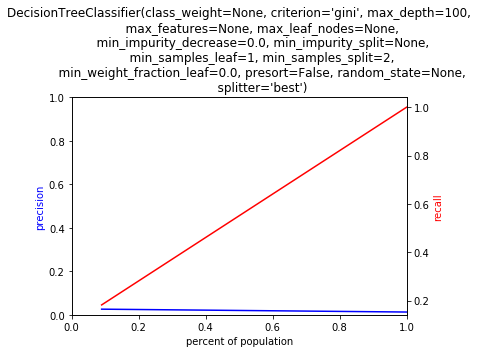

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

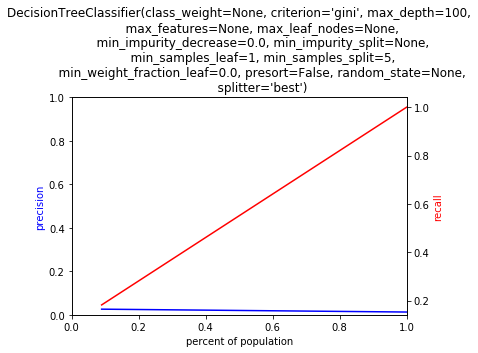

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

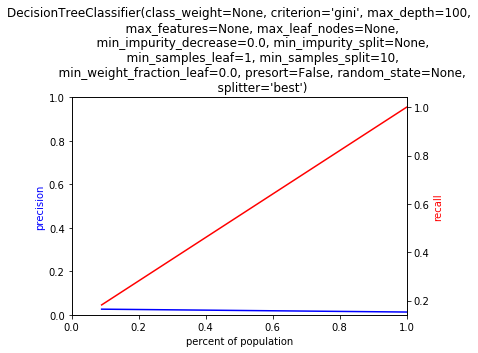

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

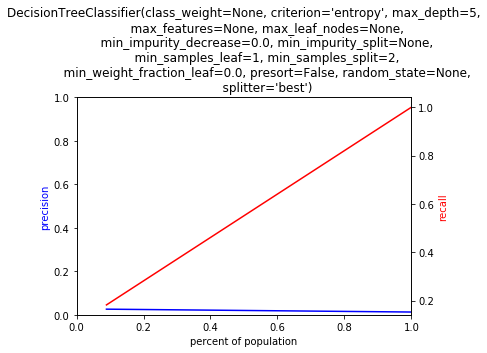

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

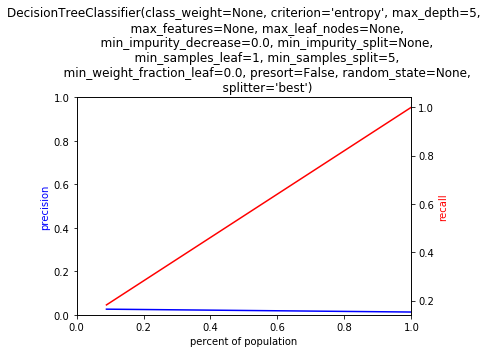

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

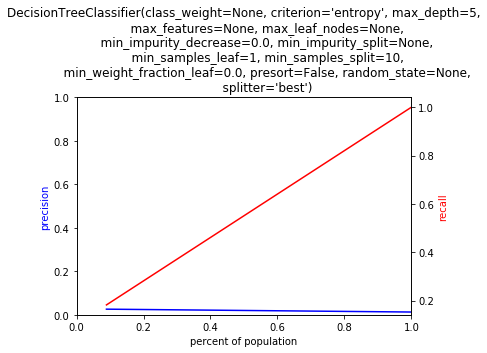

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

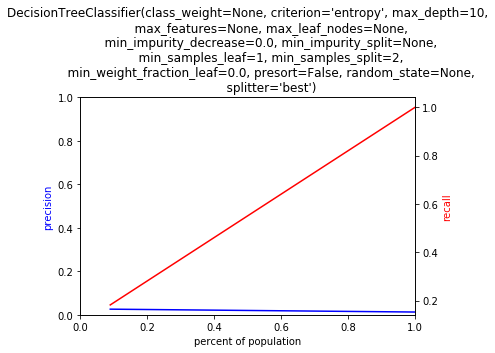

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

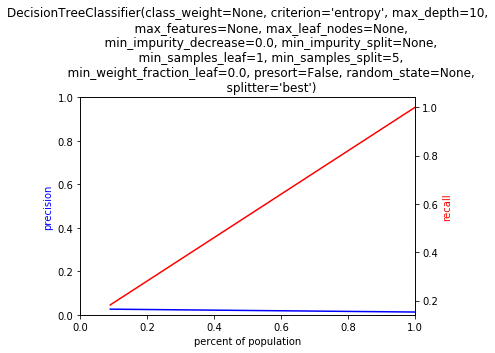

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

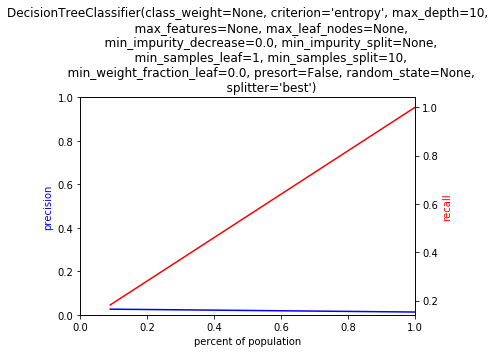

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

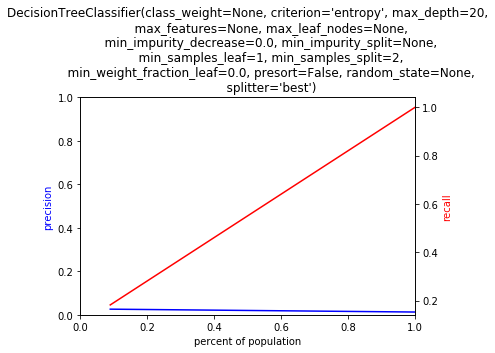

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

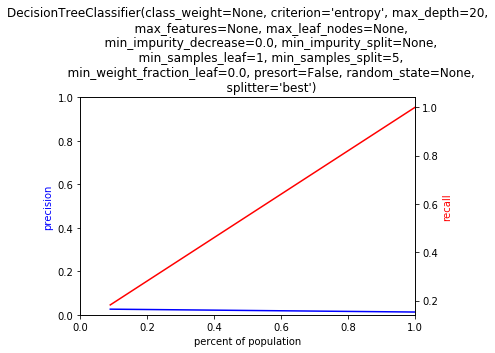

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

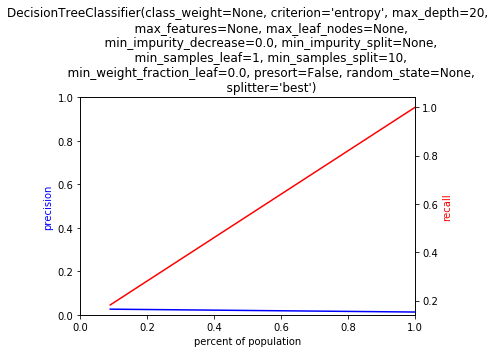

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

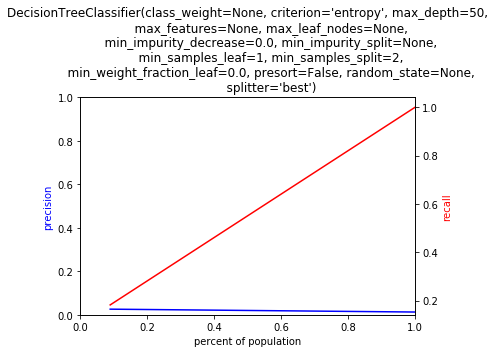

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

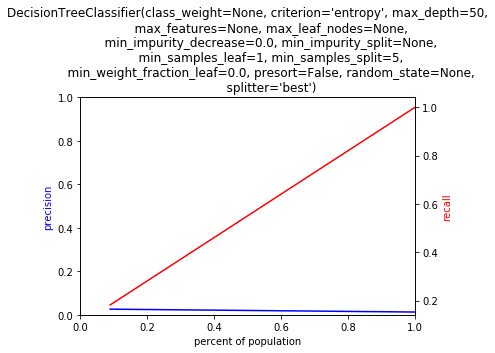

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

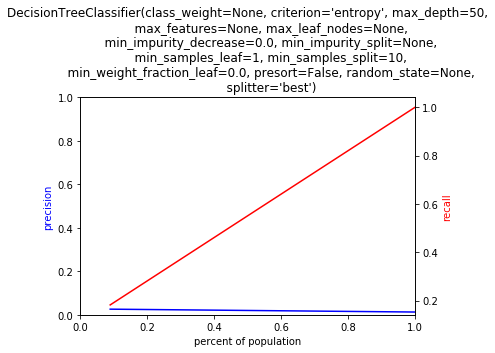

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

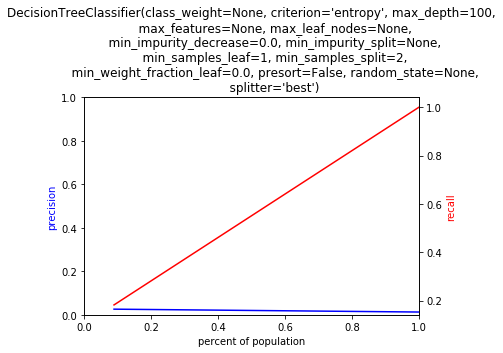

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

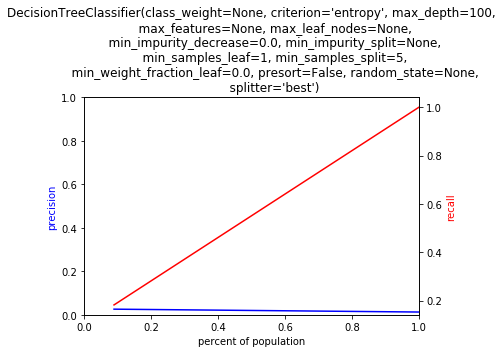

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.046296296296296294


<Figure size 432x288 with 0 Axes>

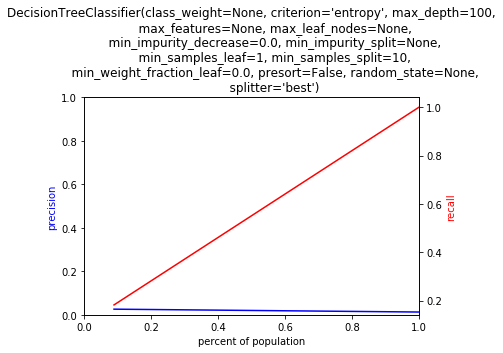

CUTOFF: 2013-12-31 VALIDATION: 2014-12-31
LR
{'C': 1e-05, 'penalty': 'l1'}
0.2679425837320574


<Figure size 432x288 with 0 Axes>

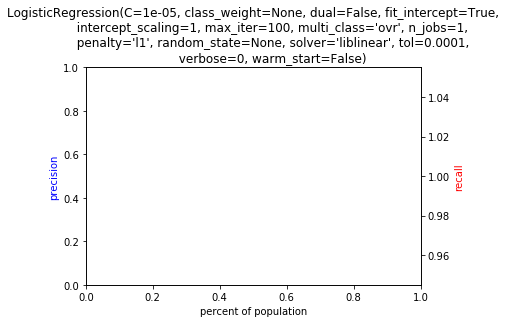

{'C': 1e-05, 'penalty': 'l2'}
0.22488038277511962


<Figure size 432x288 with 0 Axes>

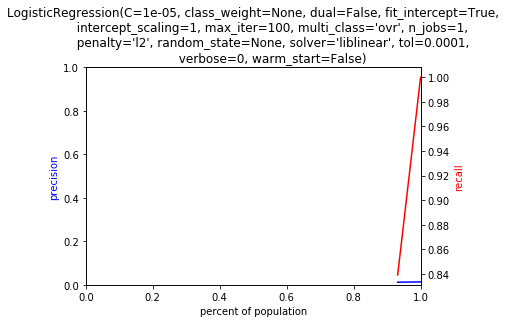

{'C': 0.001, 'penalty': 'l1'}
0.2679425837320574


<Figure size 432x288 with 0 Axes>

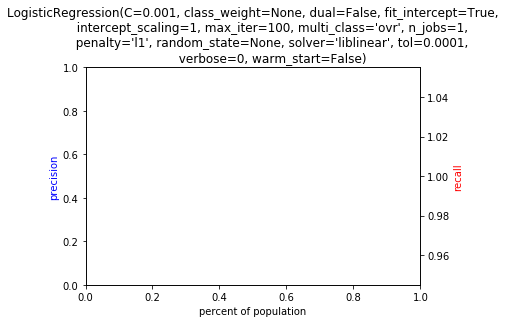

{'C': 0.001, 'penalty': 'l2'}
0.22488038277511962


<Figure size 432x288 with 0 Axes>

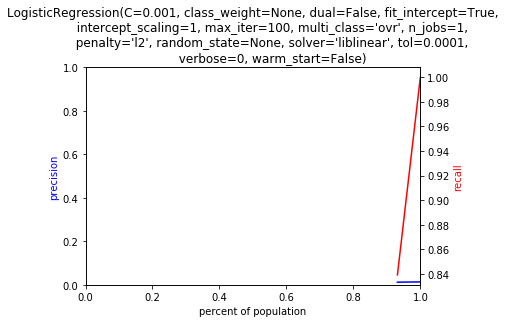

{'C': 0.1, 'penalty': 'l1'}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

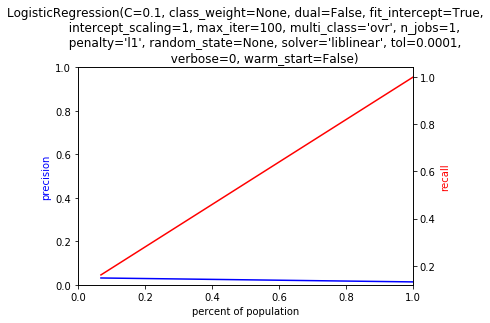

{'C': 0.1, 'penalty': 'l2'}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

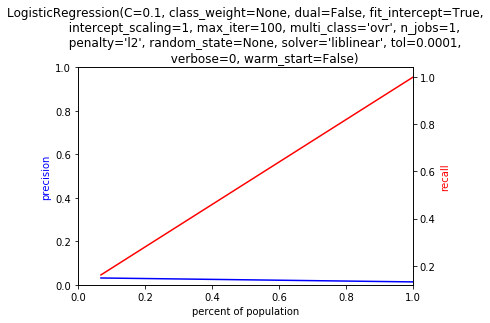

{'C': 1, 'penalty': 'l1'}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

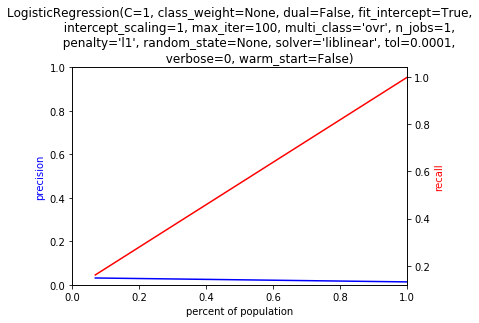

{'C': 1, 'penalty': 'l2'}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

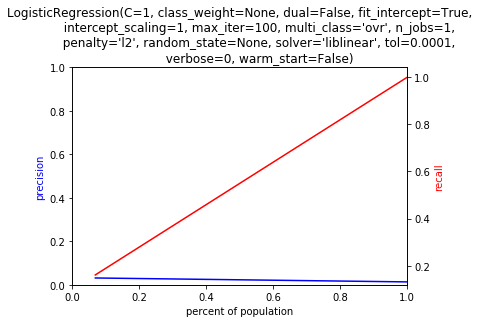

{'C': 10, 'penalty': 'l1'}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

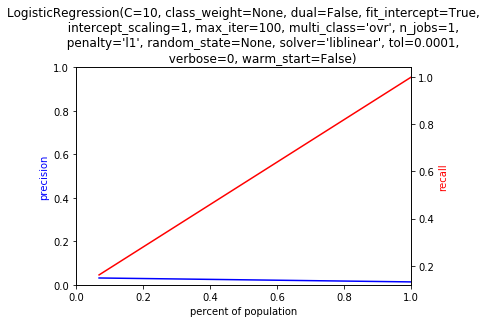

{'C': 10, 'penalty': 'l2'}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

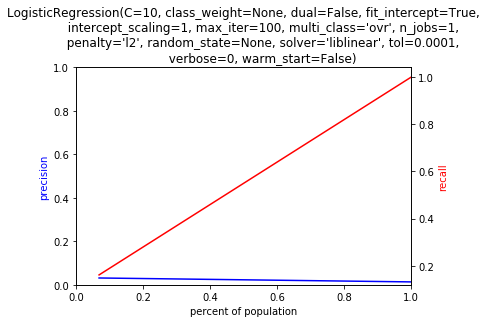

DT
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

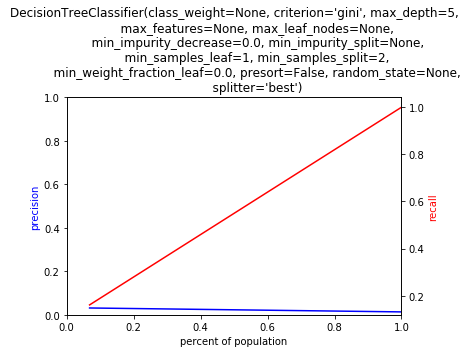

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

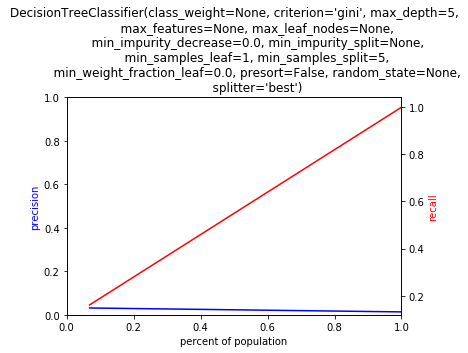

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

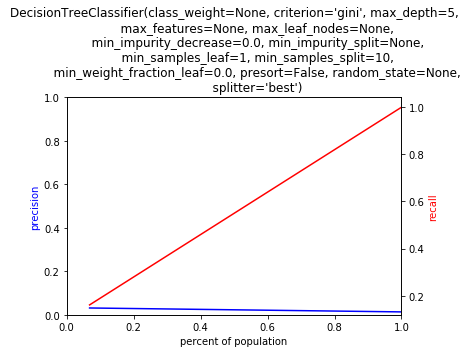

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

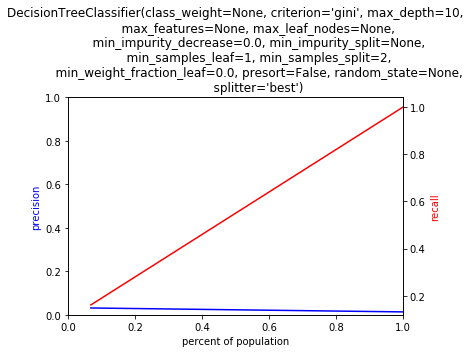

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

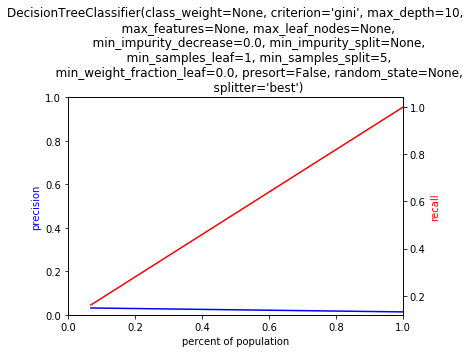

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

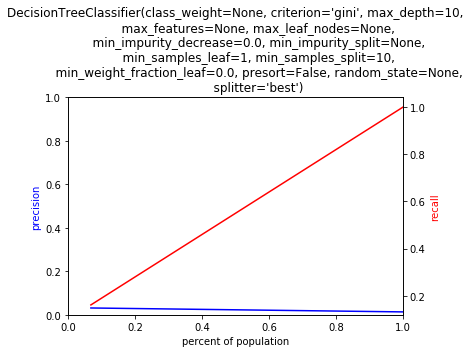

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

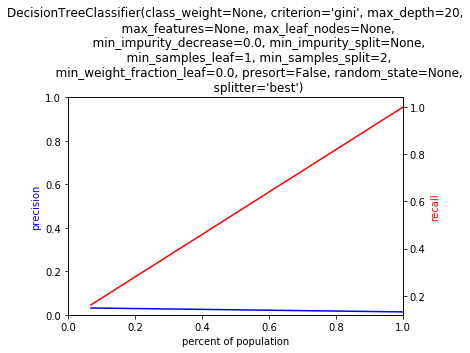

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

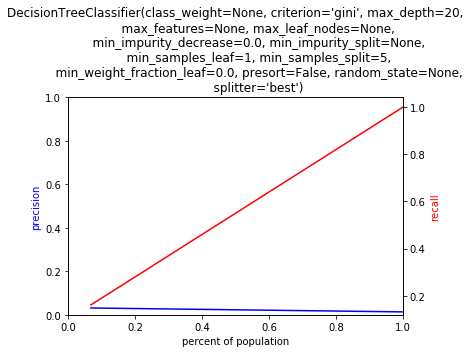

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

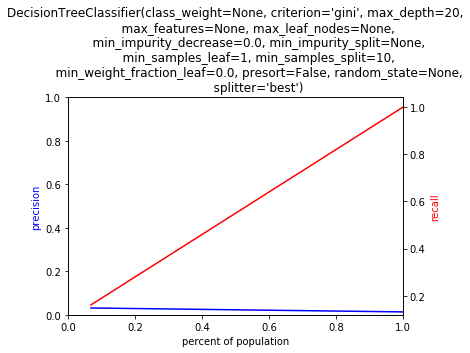

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

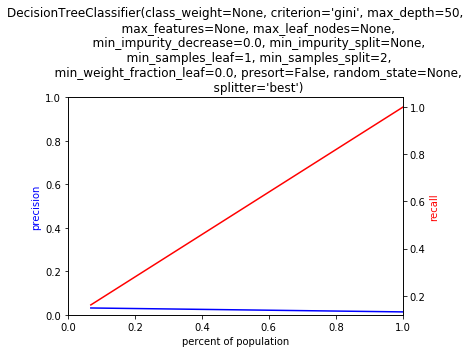

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

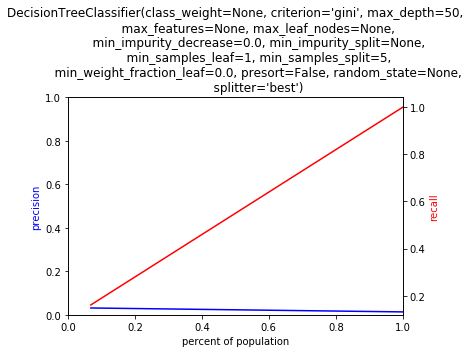

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

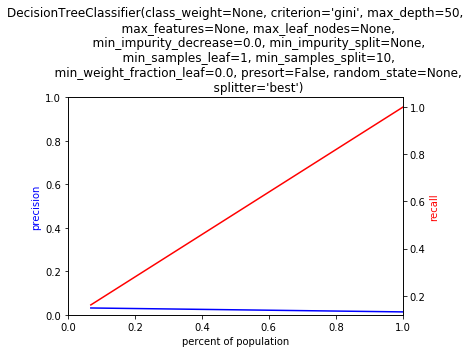

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

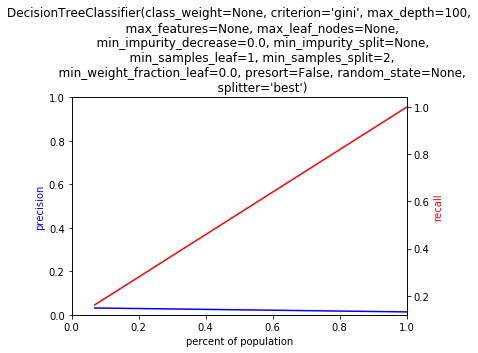

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

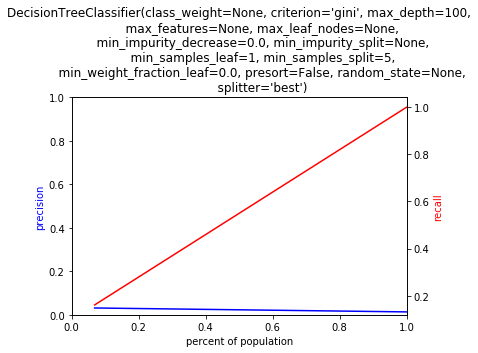

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

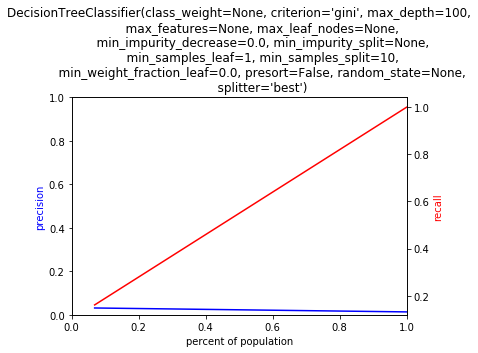

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

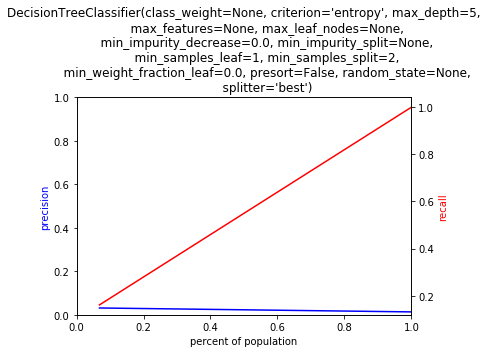

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

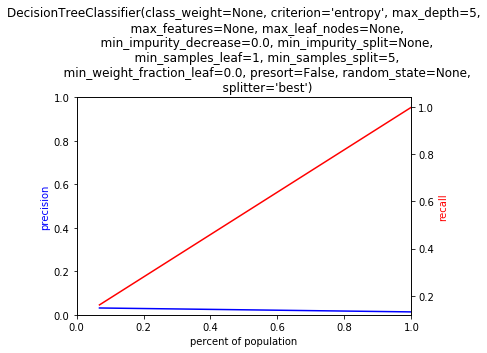

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

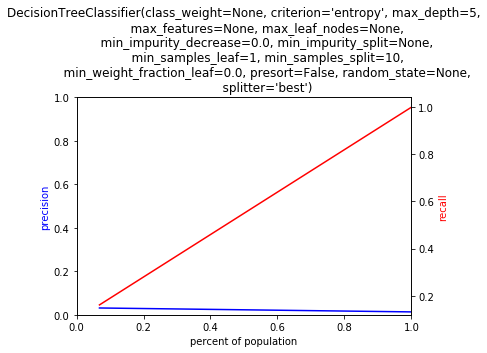

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

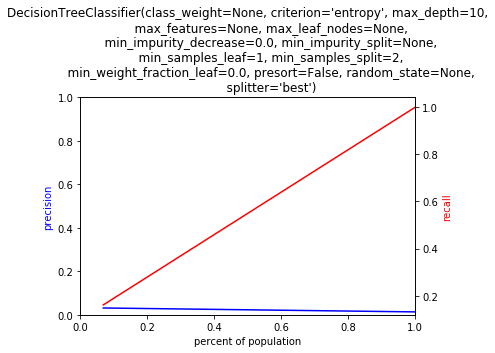

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

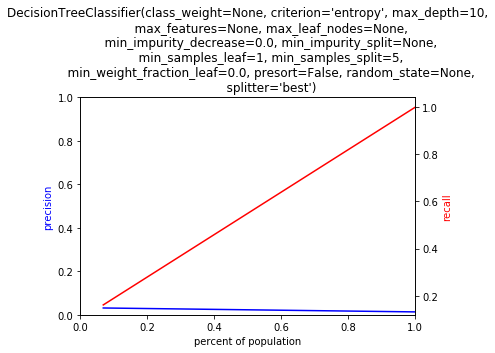

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

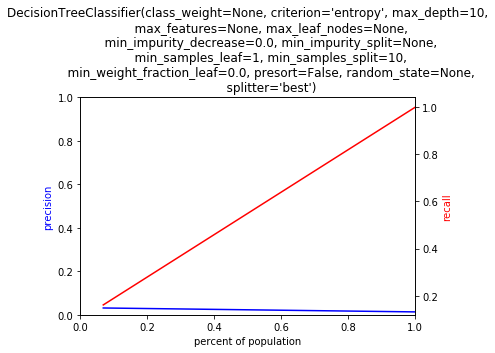

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

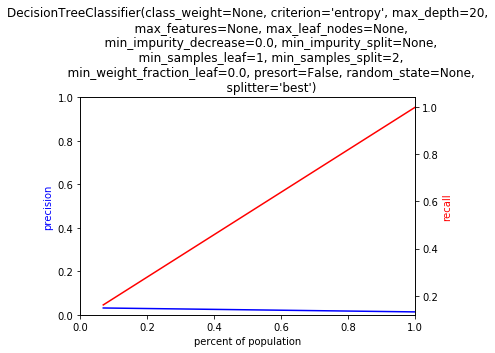

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

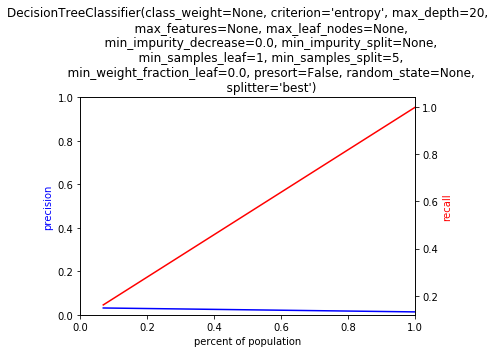

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

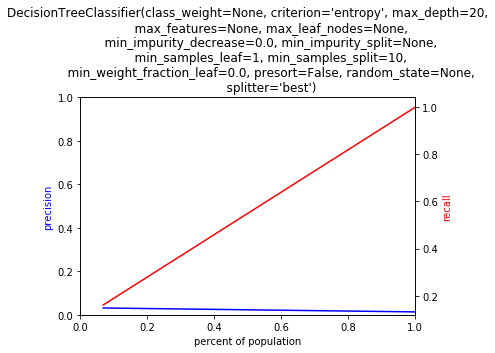

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

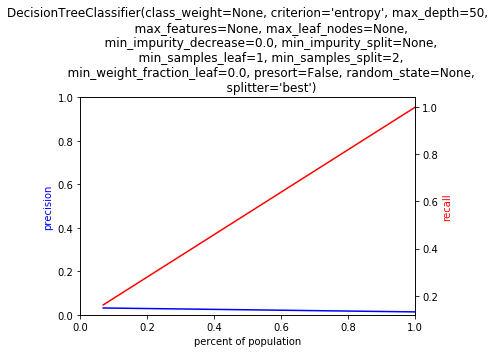

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

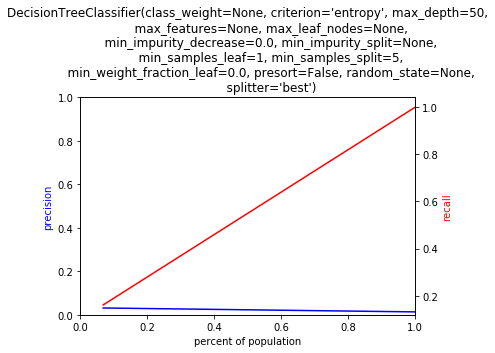

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

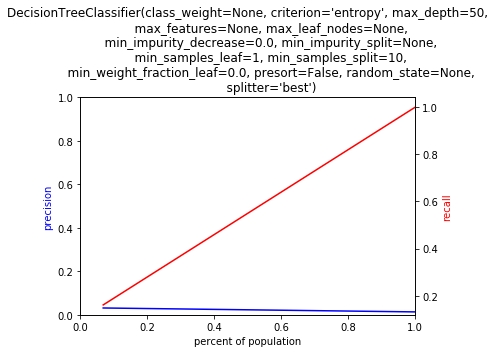

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

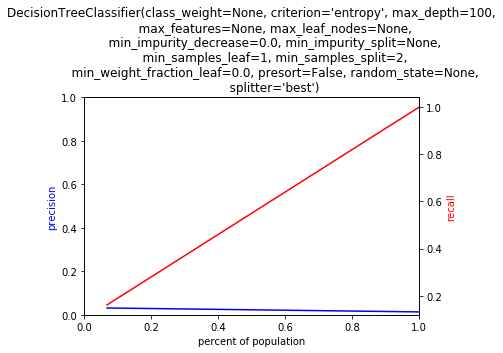

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

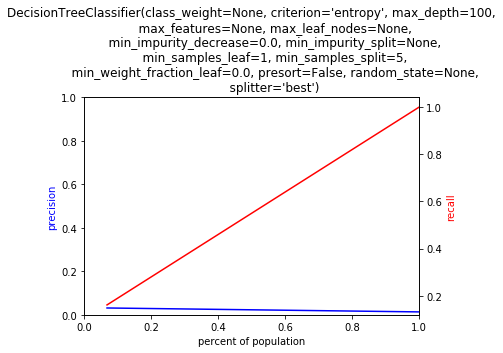

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.0430622009569378


<Figure size 432x288 with 0 Axes>

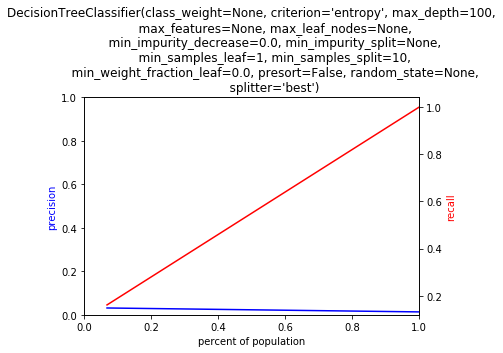

CUTOFF: 2014-12-31 VALIDATION: 2015-12-31
LR
{'C': 1e-05, 'penalty': 'l1'}
0.48826291079812206


<Figure size 432x288 with 0 Axes>

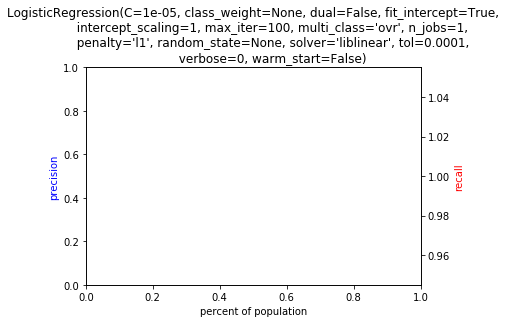

{'C': 1e-05, 'penalty': 'l2'}
0.4084507042253521


<Figure size 432x288 with 0 Axes>

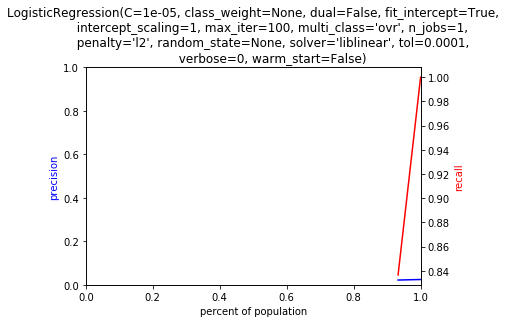

{'C': 0.001, 'penalty': 'l1'}
0.48826291079812206


<Figure size 432x288 with 0 Axes>

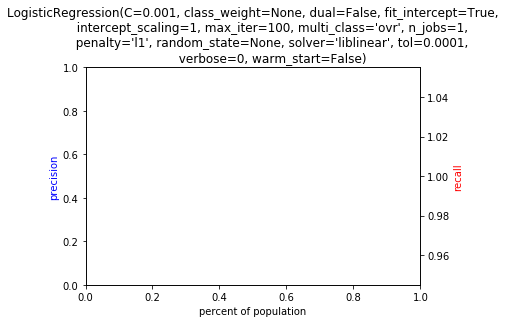

{'C': 0.001, 'penalty': 'l2'}
0.4084507042253521


<Figure size 432x288 with 0 Axes>

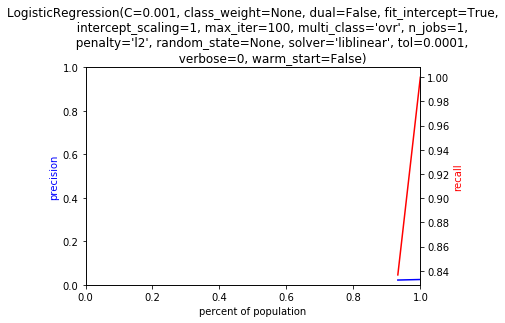

{'C': 0.1, 'penalty': 'l1'}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

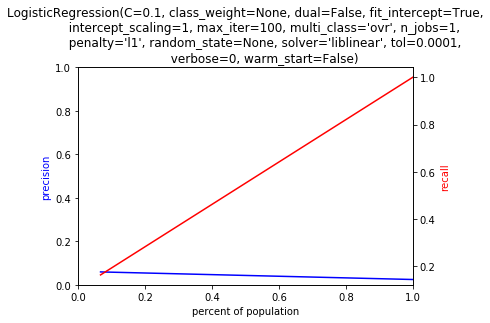

{'C': 0.1, 'penalty': 'l2'}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

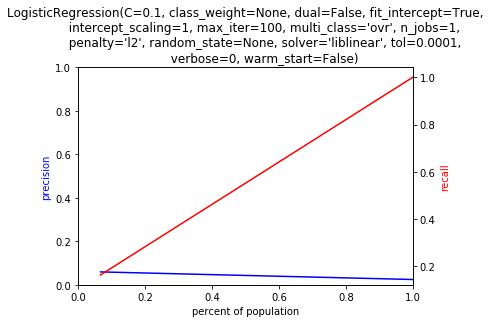

{'C': 1, 'penalty': 'l1'}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

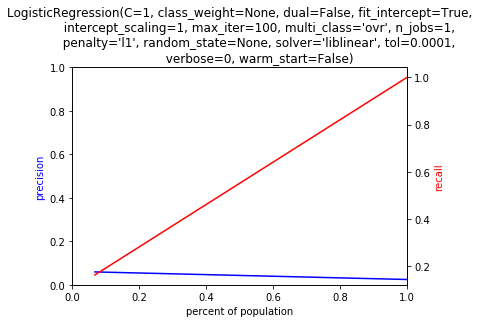

{'C': 1, 'penalty': 'l2'}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

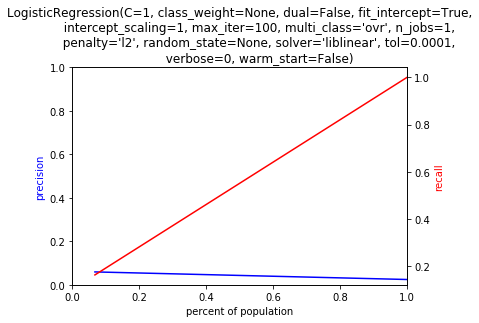

{'C': 10, 'penalty': 'l1'}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

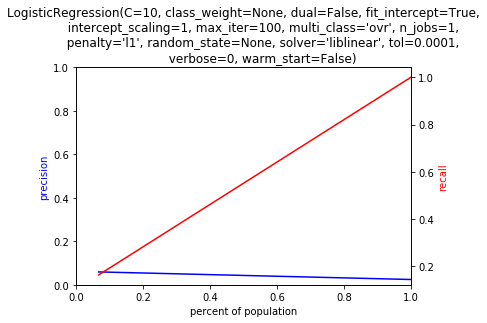

{'C': 10, 'penalty': 'l2'}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

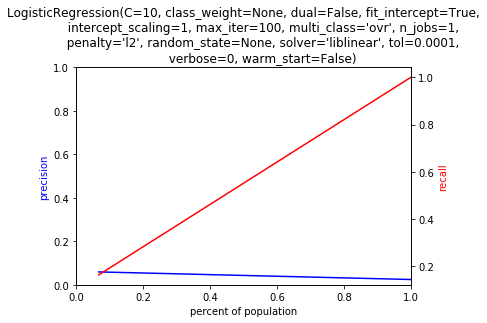

DT
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

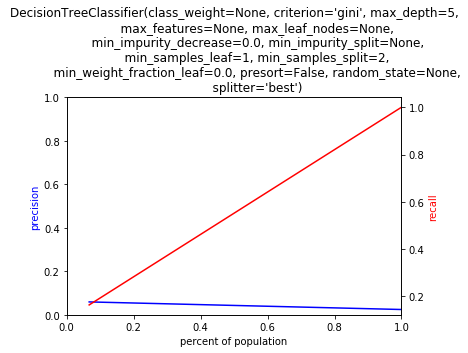

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

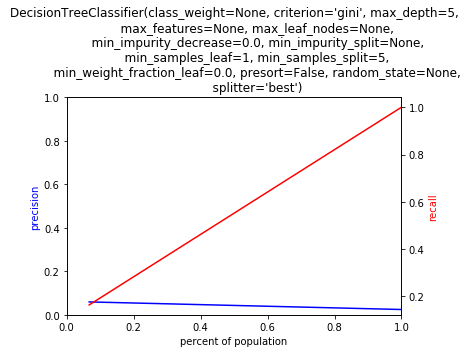

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

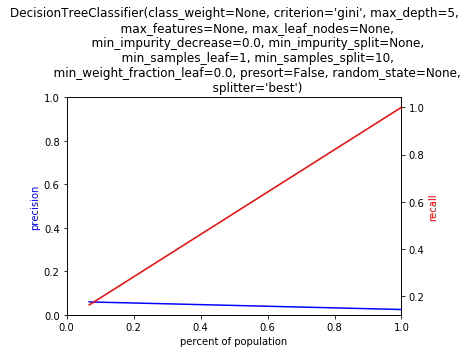

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

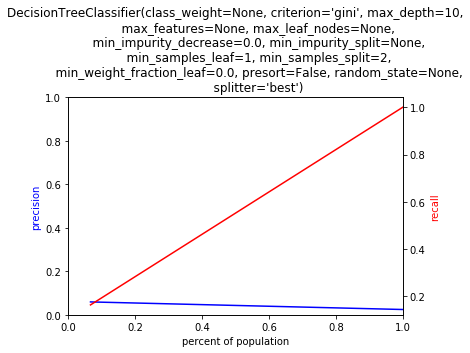

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

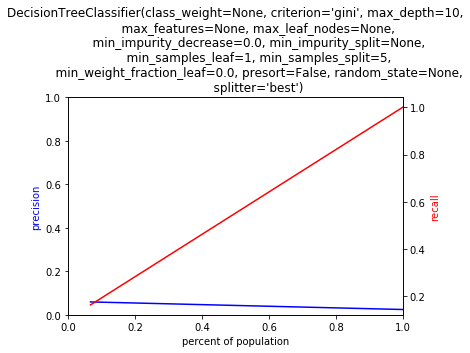

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

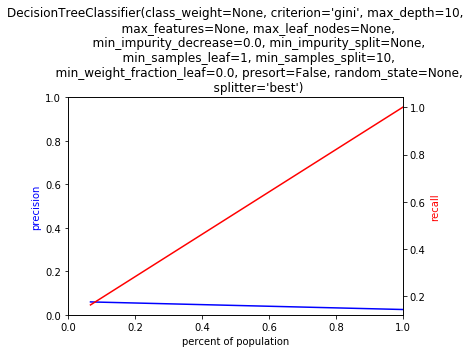

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

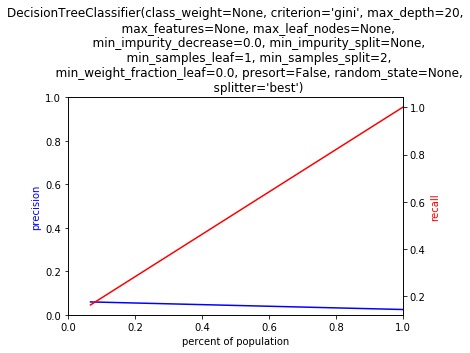

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

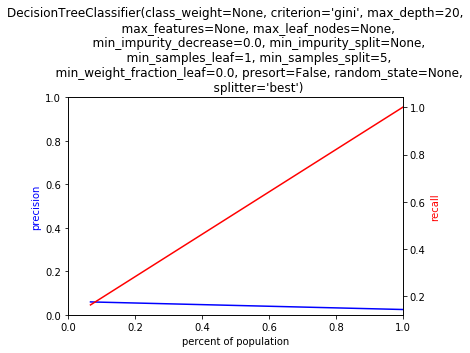

{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

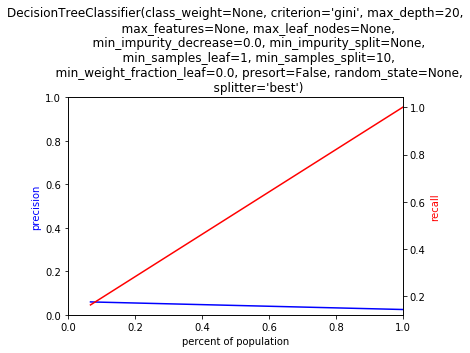

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

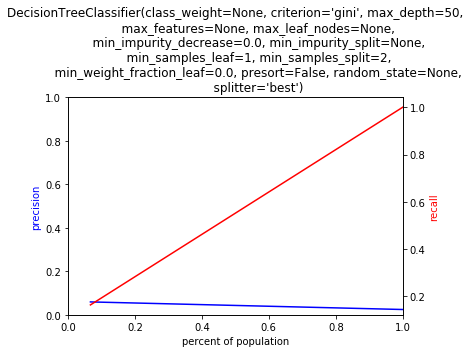

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

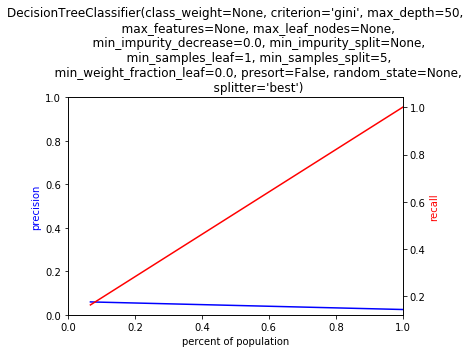

{'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

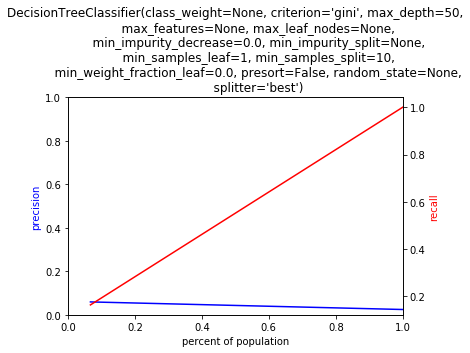

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

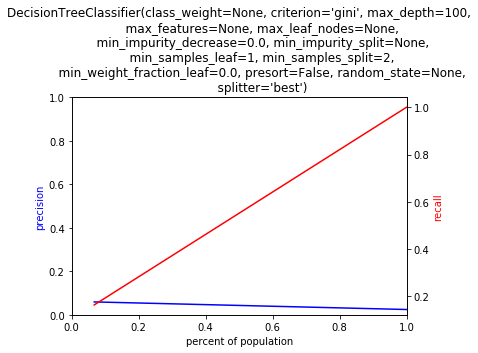

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

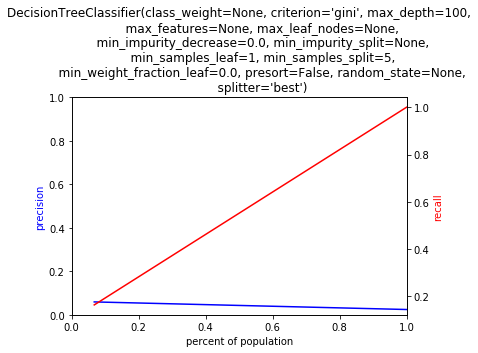

{'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

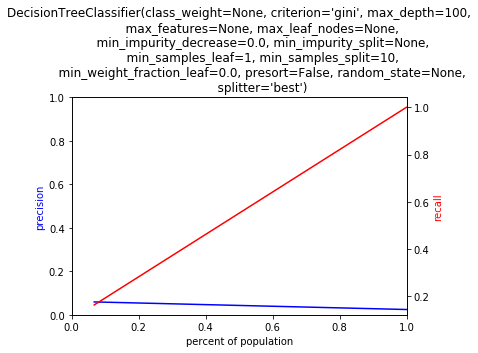

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

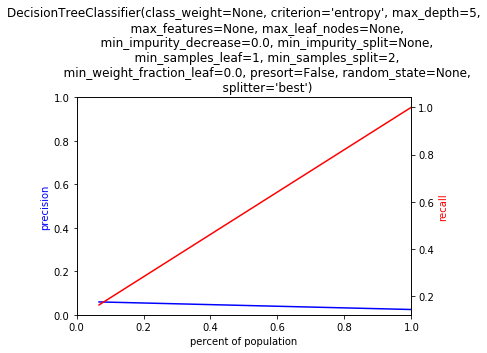

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

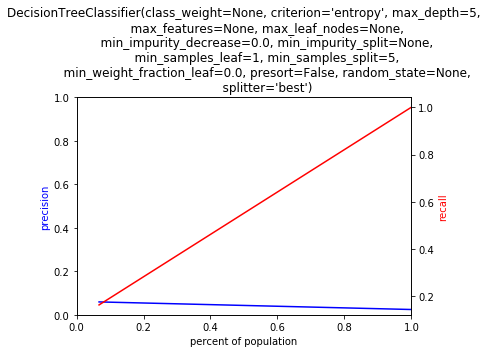

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

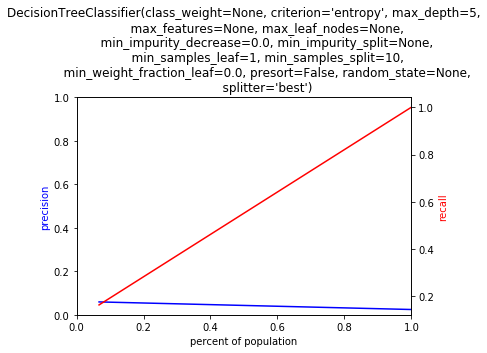

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

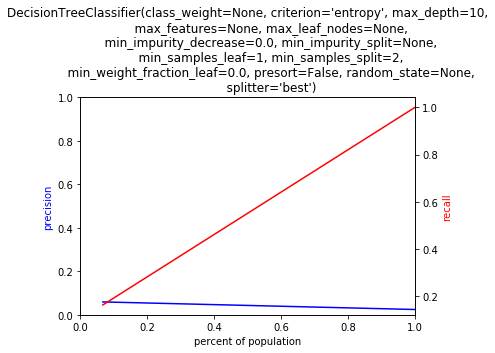

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

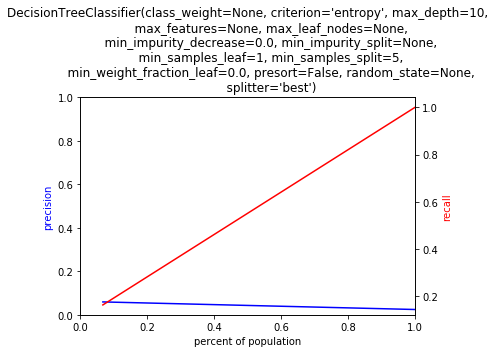

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

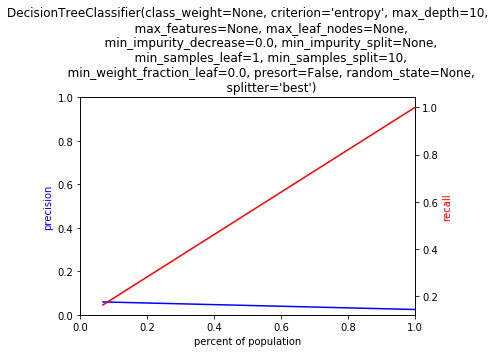

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

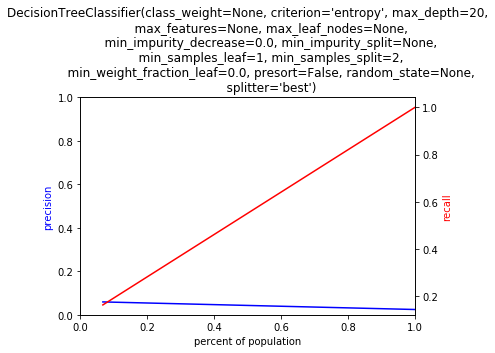

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

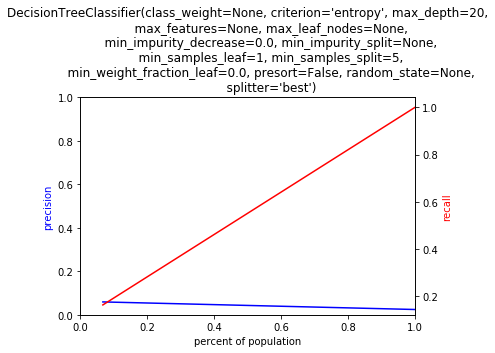

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

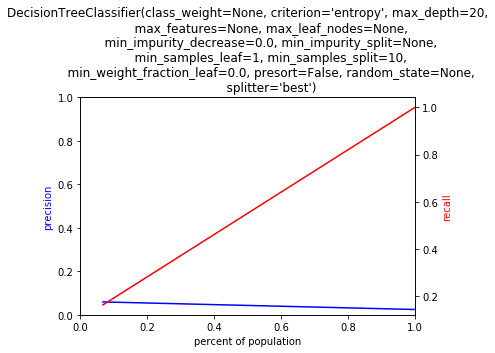

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

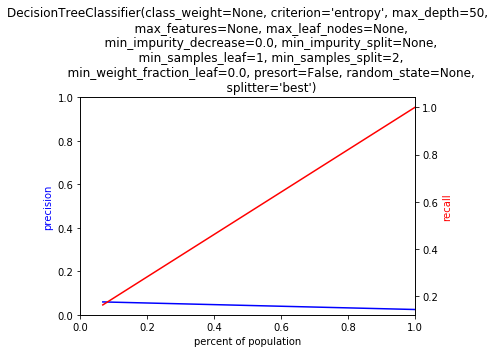

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

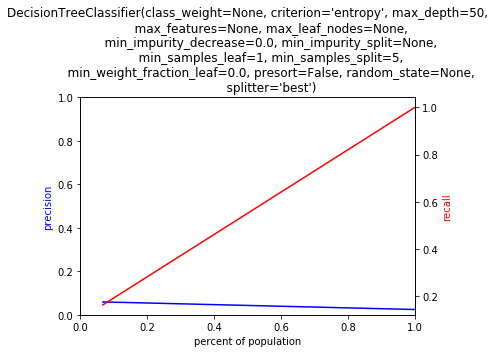

{'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

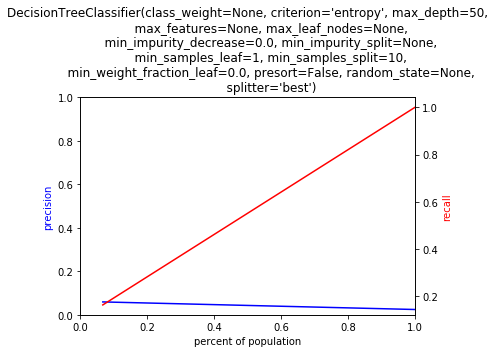

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 2}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

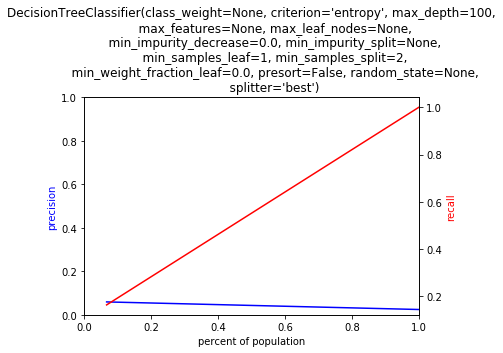

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 5}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

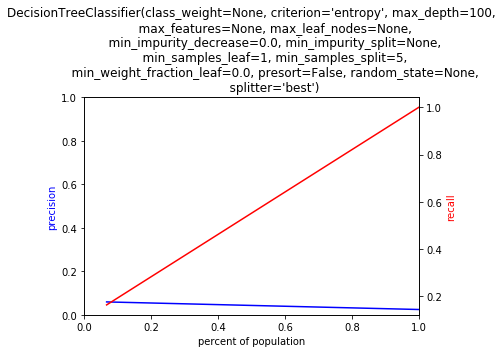

{'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_split': 10}
0.07981220657276995


<Figure size 432x288 with 0 Axes>

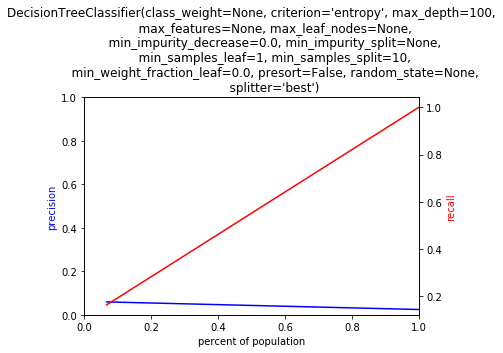

model_type                                                clf  \
0           LR  LogisticRegression(C=10, class_weight=None, du...   
1           LR  LogisticRegression(C=10, class_weight=None, du...   
2           LR  LogisticRegression(C=10, class_weight=None, du...   
3           LR  LogisticRegression(C=10, class_weight=None, du...   
4           LR  LogisticRegression(C=10, class_weight=None, du...   
5           LR  LogisticRegression(C=10, class_weight=None, du...   
6           LR  LogisticRegression(C=10, class_weight=None, du...   
7           LR  LogisticRegression(C=10, class_weight=None, du...   
8           LR  LogisticRegression(C=10, class_weight=None, du...   
9           LR  LogisticRegression(C=10, class_weight=None, du...   
10          DT  DecisionTreeClassifier(class_weight=None, crit...   
11          DT  DecisionTreeClassifier(class_weight=None, crit...   
12          DT  DecisionTreeClassifier(class_weight=None, crit...   
13          DT  DecisionTreeClassifier(class_weight=None, crit...   
14          DT  DecisionTreeClassifier(class_weight=None, crit...   
15          DT  DecisionTreeClassifier(class_weight=None, crit...   
16          DT  DecisionTreeClassifier(class_weight=None, crit...   
17          DT  DecisionTreeClassifier(class_weight=None, crit...   
18          DT  DecisionTreeClassifier(class_weight=None, crit...   
19          DT  DecisionTreeClassifier(class_weight=None, crit...   
20          DT  DecisionTreeClassifier(class_weight=None, crit...   
21          DT  DecisionTreeClassifier(class_weight=None, crit...   
22          DT  DecisionTreeClassifier(class_weight=None, crit...   
23          DT  DecisionTreeClassifier(class_weight=None, crit...   
24          DT  DecisionTreeClassifier(class_weight=None, crit...   
25          DT  DecisionTreeClassifier(class_weight=None, crit...   
26          DT  DecisionTreeClassifier(class_weight=None, crit...   
27          DT  DecisionTreeClassifier(class_weight=None, crit...   
28          DT  DecisionTreeClassifier(class_weight=None, crit...   
29          DT  DecisionTreeClassifier(class_weight=None, crit...   
..         ...                                                ...   
170         DT  DecisionTreeClassifier(class_weight=None, crit...   
171         DT  DecisionTreeClassifier(class_weight=None, crit...   
172         DT  DecisionTreeClassifier(class_weight=None, crit...   
173         DT  DecisionTreeClassifier(class_weight=None, crit...   
174         DT  DecisionTreeClassifier(class_weight=None, crit...   
175         DT  DecisionTreeClassifier(class_weight=None, crit...   
176         DT  DecisionTreeClassifier(class_weight=None, crit...   
177         DT  DecisionTreeClassifier(class_weight=None, crit...   
178         DT  DecisionTreeClassifier(class_weight=None, crit...   
179         DT  DecisionTreeClassifier(class_weight=None, crit...   
180         DT  DecisionTreeClassifier(class_weight=None, crit...   
181         DT  DecisionTreeClassifier(class_weight=None, crit...   
182         DT  DecisionTreeClassifier(class_weight=None, crit...   
183         DT  DecisionTreeClassifier(class_weight=None, crit...   
184         DT  DecisionTreeClassifier(class_weight=None, crit...   
185         DT  DecisionTreeClassifier(class_weight=None, crit...   
186         DT  DecisionTreeClassifier(class_weight=None, crit...   
187         DT  DecisionTreeClassifier(class_weight=None, crit...   
188         DT  DecisionTreeClassifier(class_weight=None, crit...   
189         DT  DecisionTreeClassifier(class_weight=None, crit...   
190         DT  DecisionTreeClassifier(class_weight=None, crit...   
191         DT  DecisionTreeClassifier(class_weight=None, crit...   
192         DT  DecisionTreeClassifier(class_weight=None, crit...   
193         DT  DecisionTreeClassifier(class_weight=None, crit...   
194         DT  DecisionTreeClassifier(class_weight=None, crit...   
195         DT  DecisionTreeClassifier(class_weight=None, crit...   
19

In [70]:
temporal_validation_loop([('2010-12-31', '2011-12-31'),
                        ('2011-12-31', '2012-12-31'),
                        ('2012-12-31', '2013-12-31'),
                        ('2013-12-31', '2014-12-31'),
                        ('2014-12-31', '2015-12-31')], 
                         grid_size='small', 
                         to_run=['LR', 'DT'], 
                         basic=['mh_3yr'], 
                         filename='results/basic.pkl')

In [71]:
just_mh = pd.read_pickle('results/basic.pkl')

In [72]:
basic = get_best_model(just_mh, 'precision_at_5', 0)

In [74]:
for k, group in basic.groupby('validation_date'):
    print(k, 'BASELINE:', group.baseline.max(), 'MEAN PRECISION:', group.precision_at_5.mean())

2011-12-31 BASELINE: 0.03381752156150704 MEAN PRECISION: 0.1545454545454545
2012-12-31 BASELINE: 0.022559962004274518 MEAN PRECISION: 0.17619047619047623
2013-12-31 BASELINE: 0.012728535061328396 MEAN PRECISION: 0.046296296296296294
2015-12-31 BASELINE: 0.024361677207776995 MEAN PRECISION: 0.07981220657276995


### Build simple two level decision tree using only 3 variables
- mh_3yr: releasee had a prior encounter with the mental health system in the last 3 year before booking
- bail_3yr: number of times individual made bail in the last 3 years before current booking
- jail_3yr: releasee had additional bookings in the last 3 years before current booking

In [49]:
%run evaluation.py
time_split_trees(p={'criterion': 'entropy', 'max_depth': 2, 'max_features': None},
                    cv_pairs=[('2010-12-31', '2011-12-31'),
                                ('2011-12-31', '2012-12-31'),
                                ('2012-12-31', '2013-12-31'),
                                ('2013-12-31', '2014-12-31'),
                                ('2014-12-31', '2015-12-31')], basic = ['mh_3yr', 'jail_3yr', 'bail_3yr'])

CUTOFF: 2010-12-31 VALIDATION: 2011-12-31
0.15454545454545454
CUTOFF: 2011-12-31 VALIDATION: 2012-12-31
0.14285714285714285
CUTOFF: 2012-12-31 VALIDATION: 2013-12-31
0.046296296296296294
CUTOFF: 2013-12-31 VALIDATION: 2014-12-31
0.0430622009569378
CUTOFF: 2014-12-31 VALIDATION: 2015-12-31
0.07981220657276995


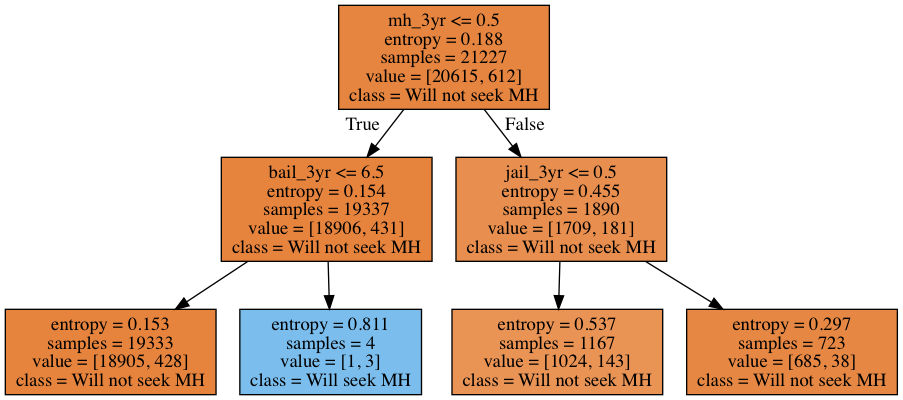

In [50]:
from IPython.display import Image
Image('results/c2014_v2015_tree.png')

### Evaluate Feature Importance and Bias

![](https://dssg.github.io/aequitas/_images/metrics.jpg)

- False Omission Rate(FOR): fraction of false negatives within predicted negative
- False Positive Rate(FPR): fraction of false positives within labeled negative  
    
Precision: when our classifier classifies something as positive, how likely is it that the prediction is correct?
- true positive / total classified positive
Recall: for all actual positive values, how likely is our predictor to predict it as True?
- true positive / total actual positive

model_type                                                           KNN
clf                    KNeighborsClassifier(algorithm='ball_tree', le...
parameters             {'algorithm': 'ball_tree', 'n_jobs': -1, 'n_ne...
cutoff_date                                                   2014-12-31
validation_date                                               2015-12-31
train_set_size                                                     21227
validation_set_size                                                 4269
baseline                                                       0.0243617
precision_at_5                                                  0.253521
precision_at_10                                                 0.244131
precision_at_20                                                 0.121923
precision_at_30                                                  0.08125
precision_at_50                                                0.0487348
recall_at_5                                        

<Figure size 432x288 with 0 Axes>

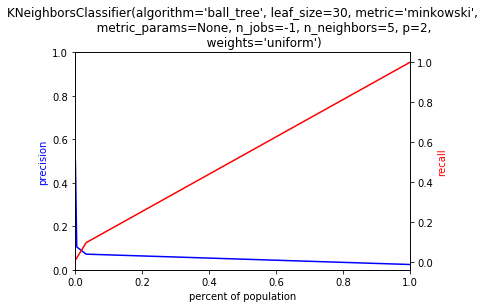

model_type                                                            RF
clf                    (DecisionTreeClassifier(class_weight=None, cri...
parameters             {'max_depth': 10, 'max_features': 'log2', 'min...
cutoff_date                                                   2014-12-31
validation_date                                               2015-12-31
train_set_size                                                     21227
validation_set_size                                                 4269
baseline                                                       0.0243617
precision_at_5                                                 0.0798122
precision_at_10                                                 0.129108
precision_at_20                                                 0.094959
precision_at_30                                                0.0632812
precision_at_50                                                0.0379569
recall_at_5                                        

<Figure size 432x288 with 0 Axes>

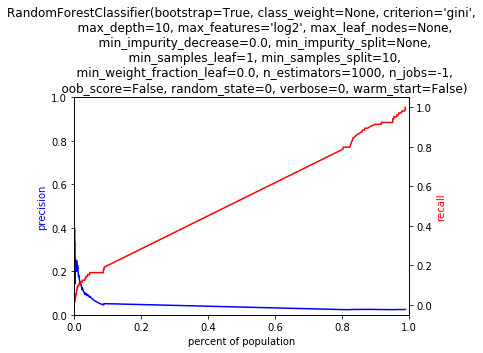

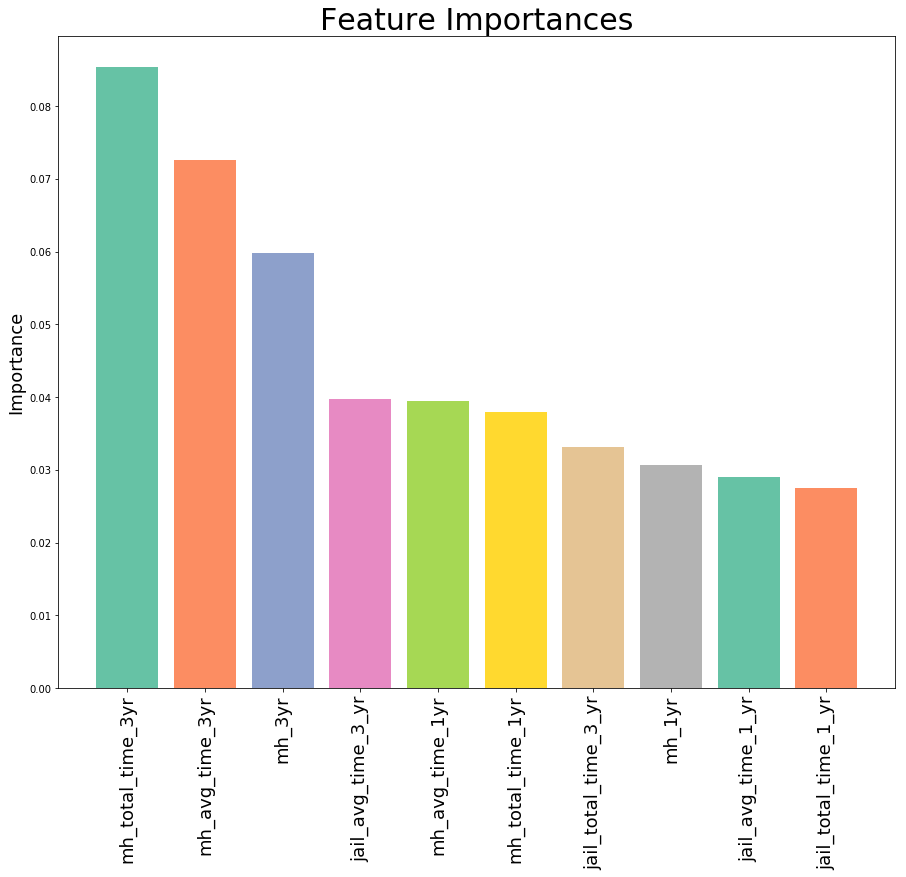

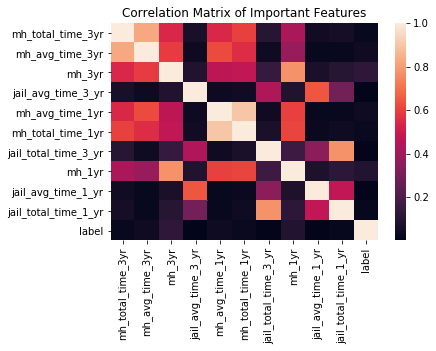

model_id, score_thresholds 1 {'rank_abs': [200]}
COUNTS::: race
AMERICAN INDIAN OR ALASKA NATIVE       1
ASIAN                                  6
BLACK OR AFRICAN AMERICAN           1005
WHITE                               3257
dtype: int64
COUNTS::: sex
FEMALE    1158
MALE      3111
dtype: int64
get_disparity_predefined_group()
  attribute_name                   attribute_value  fdr_disparity  \
0           race  AMERICAN INDIAN OR ALASKA NATIVE            NaN   
1           race                             ASIAN            NaN   
2           race         BLACK OR AFRICAN AMERICAN       0.914174   
3           race                             WHITE       1.000000   
4            sex                            FEMALE       1.010713   
5            sex                              MALE       1.000000   

   fpr_disparity  for_disparity  fnr_disparity  precision  
0       0.000000       0.000000            NaN        NaN  
1       0.000000       0.000000            NaN        NaN  
2    

In [97]:
% run evaluation.py
evaluate_best_models(best_on_final.loc[[10, 95]])

### Bias on our best model

In [98]:
bm = best_on_final.loc[10]
clf = bm.clf
clf.set_params(**bm.parameters)
train = pd.read_pickle('data/c2014_v2015_train.pkl')
test = pd.read_pickle('data/c2014_v2015_test.pkl')
X_train, y_train, X_test, y_test = model_ready(*pre_process(train, test))
bias_raw = get_bias_df(clf, X_train, y_train, X_test, y_test, test)
biasd_df = measure_bias(bias_raw, score_thresholds={'rank_abs': [200]}, groups= {'race': 'WHITE','sex': 'MALE'},
                                                        attr_cols = ['race', 'sex'])

model_id, score_thresholds 1 {'rank_abs': [200]}
COUNTS::: race
AMERICAN INDIAN OR ALASKA NATIVE       1
ASIAN                                  6
BLACK OR AFRICAN AMERICAN           1005
WHITE                               3257
dtype: int64
COUNTS::: sex
FEMALE    1158
MALE      3111
dtype: int64
get_disparity_predefined_group()


In [99]:
bias_df.columns = ['Attribute Name', 'Attribute Value', 'False Discovery Disparity', 'False Positive Disparity', 'False Omission Disparity', 'False Negative Disparity', 'Precision']

In [100]:
bias_df

Attribute Name                   Attribute Value  False Discovery Disparity  \
0           race  AMERICAN INDIAN OR ALASKA NATIVE                        NaN   
1           race                             ASIAN                        NaN   
2           race         BLACK OR AFRICAN AMERICAN                   1.009695   
3           race                             WHITE                   1.000000   
4            sex                            FEMALE                   0.921134   
5            sex                              MALE                   1.000000   

   False Positive Disparity  False Omission Disparity  \
0                  0.000000                  0.000000   
1                  0.000000                  0.000000   
2                  0.759908                  0.623497   
3                  1.000000                  1.000000   
4                  1.498108                  2.636512   
5                  1.000000                  1.000000   

   False Negative Disparity  Precision  
0                       NaN        NaN  
1                       NaN        NaN  
2                  0.996944   0.052632  
3                  1.000000   0.061728  
4                  0.921317   0.108108  
5                  1.000000   0.031746